<a href="https://colab.research.google.com/github/sharadpahuja/Projects/blob/main/employee_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement


To predict the salary of employee based on the information provided in the dataset.

## How will the company profit from this solution?
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

## How will the employee profit from this solution?

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor. 
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.



## Dataset Desciption

The dataset folder contains the following files:

train_dataset.csv = 1000000 x 8

train_salaries.csv = 1000000 x 2

test_dataset.csv =  1000000 x 8

Columns Provided in the Dataset

1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm
import time

In [2]:
# Load the train_dataset, train_salaries, test_dataset
train_data = pd.read_csv('train_dataset.csv')
train_data_salaries = pd.read_csv('train_salaries.csv')
test_data = pd.read_csv('test_dataset.csv')

In [3]:
# Adding salary data to train_dataset
train_data['salary'] = train_data_salaries['salary']

# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [4]:
# get all column names
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [5]:
train_data['salary'] = train_data['salary'].astype(int)
train_data['milesFromMetropolis'] = train_data['milesFromMetropolis'].astype(float)

In [6]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   jobId                1000000 non-null  object 
 1   companyId            1000000 non-null  object 
 2   jobType              1000000 non-null  object 
 3   degree               1000000 non-null  object 
 4   major                1000000 non-null  object 
 5   industry             1000000 non-null  object 
 6   yearsExperience      1000000 non-null  int64  
 7   milesFromMetropolis  1000000 non-null  float64
 8   salary               1000000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 68.7+ MB


In [7]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [8]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
train_data.describe()

yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717936
min           0.000000             0.000000        0.000000
25%           6.000000            25.000000       88.000000
50%          12.000000            50.000000      114.000000
75%          18.000000            75.000000      141.000000
max          24.000000            99.000000      301.000000

In [9]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test_data.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

## Get the total number of samples in the dataset using the len() function

In [10]:
# len of train and test dataset
print('train data length:',len(train_data))
print('test data length:',len(test_data))

train data length: 1000000
test data length: 1000000


## Get unique values

In [11]:
# get how many unique values are in train_dataset
for x in train_data.columns:
  print(x,":",len(train_data[x].unique()))

jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 280


In [12]:
# get how many unique values are in test_dataset
for x in test_data.columns:
  print(x,":",len(test_data[x].unique()))

jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


## Counting the total number of missing values¶

In [13]:
# Check for missing values in all the columnns of the train_dataset
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [14]:
 # Check for missing values in all the columnns of the test_dataset
 test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [15]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(['jobId', 'companyId'], axis = 1)
train_data

jobType       degree  ... milesFromMetropolis salary
0                  CFO      MASTERS  ...                83.0    130
1                  CEO  HIGH_SCHOOL  ...                73.0    101
2       VICE_PRESIDENT     DOCTORAL  ...                38.0    137
3              MANAGER     DOCTORAL  ...                17.0    142
4       VICE_PRESIDENT    BACHELORS  ...                16.0    163
...                ...          ...  ...                 ...    ...
999995  VICE_PRESIDENT    BACHELORS  ...                94.0     88
999996             CTO  HIGH_SCHOOL  ...                35.0    160
999997          JUNIOR  HIGH_SCHOOL  ...                81.0     64
999998             CFO      MASTERS  ...                 5.0    149
999999          JUNIOR    BACHELORS  ...                11.0     88

[1000000 rows x 7 columns]

In [16]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(['jobId', 'companyId'], axis = 1)
test_data



jobType       degree  ... yearsExperience milesFromMetropolis
0              MANAGER  HIGH_SCHOOL  ...              22                  73
1               JUNIOR         NONE  ...              20                  47
2                  CTO      MASTERS  ...              17                   9
3              MANAGER  HIGH_SCHOOL  ...              14                  96
4               JUNIOR     DOCTORAL  ...              10                  44
...                ...          ...  ...             ...                 ...
999995  VICE_PRESIDENT    BACHELORS  ...              14                   3
999996         MANAGER         NONE  ...              20                  67
999997         JANITOR         NONE  ...               1                  91
999998             CTO     DOCTORAL  ...              14                  63
999999          JUNIOR         NONE  ...              16                  31

[1000000 rows x 6 columns]

## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [17]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical and numerical data column name and storing in respective list variable
for x in train_data.columns:
  if train_data[x].dtype == 'object':
    categorical_list.append(x)
  elif train_data[x].dtype == 'int64':
    var_list.append(x)
  elif train_data[x].dtype == 'float64':
    var_list.append(x)    


## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [18]:
# Correlation metrix using pandas
corr = train_data.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

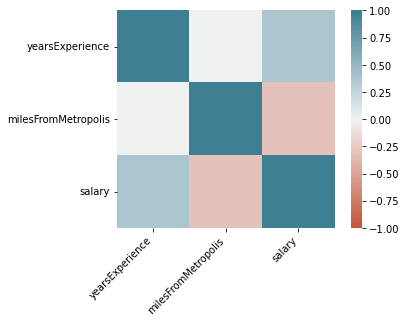

In [19]:
# Correlation metrix using seaborn
ax = sns.heatmap(corr, vmin =-1, vmax =1, center =0, cmap= sns.diverging_palette(20, 220, n= 200), square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [20]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# creating function for performing chi-sqaure test on two columns
def perform_chi_square_test(var_1, var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1], train_data[var_2])
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f = (no_of_rows-1)*(no_of_columns-1)
    print('degree of freedom:', degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance Level:', alpha)

    #chi-square statistic
    chi_square = sum([(o-e)**2/e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    print('chi-square statistic:', chi_square_statistic)

    #critical_value
    critical_value = chi2.ppf(q =1-alpha,df =degree_f)
    print('critical_value:', critical_value)

    #p-value
    p_value = 1-chi2.cdf(x = chi_square_statistic, df= degree_f)
    print('p_value', p_value)

    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on chi_square_statistic and critical_value     
    if chi_square_statistic>=critical_value:
      print('Reject H0, There is a relationship between 2 categorical variables')
    else:
      print('Retain H0, There is no relationship between 2 categorical variables')
    
    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on p_value and alpha
    if p_value <= alpha:
      print('Reject H0, There is a relationship between 2 categorical variables')
    else:
      print('Retain H0, There is no relationship between 2 categorical variables')


In [21]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
  for i in categorical_list:
    if i != x:
      print('chi-square test on:', x,'',i, '\n')
      perform_chi_square_test(x,i)
      print('------------------------------------------\n')

chi-square test on: jobType  degree 

degree of freedom: 28
Significance Level: 0.05
chi-square statistic: 50117.72406771936
critical_value: 41.33713815142739
p_value 0.0
Reject H0, There is a relationship between 2 categorical variables
Reject H0, There is a relationship between 2 categorical variables
------------------------------------------

chi-square test on: jobType  major 

degree of freedom: 56
Significance Level: 0.05
chi-square statistic: 16703.025256041707
critical_value: 74.46832415930936
p_value 0.0
Reject H0, There is a relationship between 2 categorical variables
Reject H0, There is a relationship between 2 categorical variables
------------------------------------------

chi-square test on: jobType  industry 

degree of freedom: 42
Significance Level: 0.05
chi-square statistic: 14.913329934821567
critical_value: 58.12403768086803
p_value 0.9999643570205455
Retain H0, There is no relationship between 2 categorical variables
Retain H0, There is no relationship between 2

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


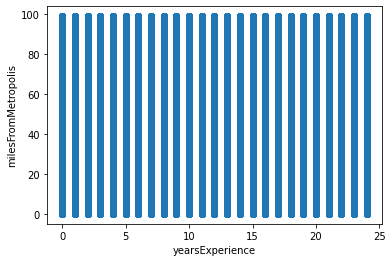

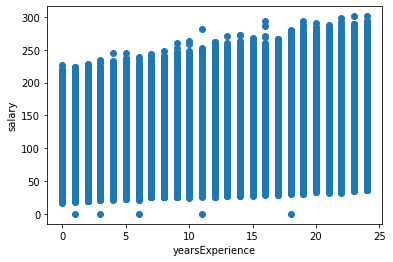

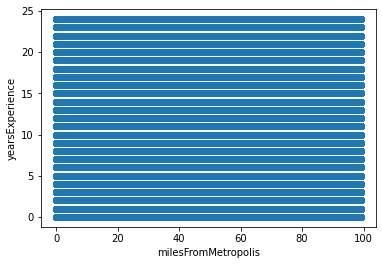

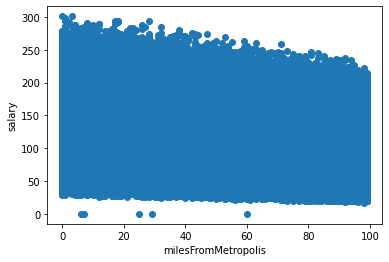

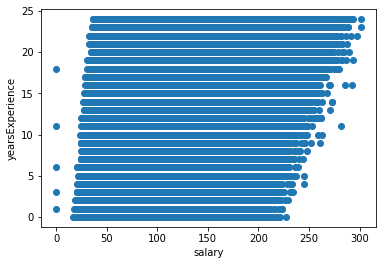

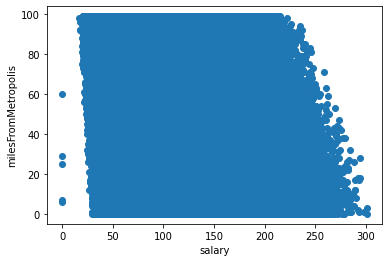

In [22]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x,y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x], train_data[y])
  plt.show()


# Loop through numerical data list and use function to scatter plot between two columns
for i in var_list:
  for j in var_list:
    if i != j:
      plot_scatter(i,j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1145147fd0>,
      dtype=object)

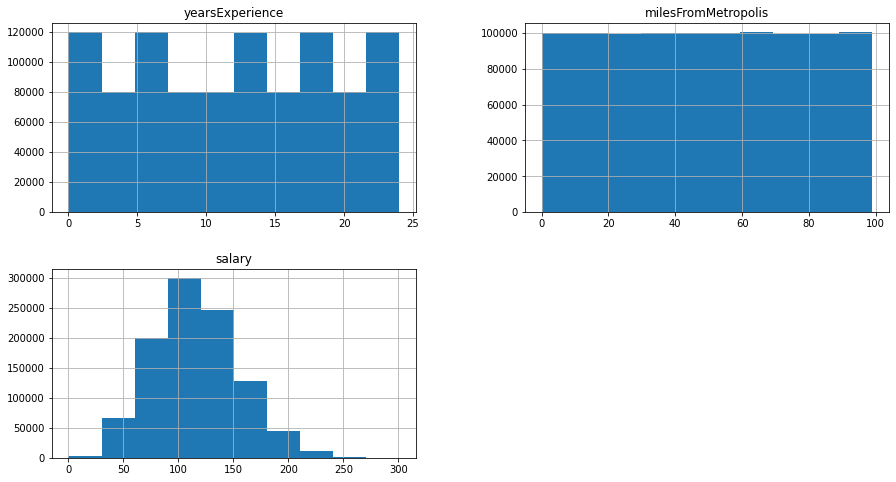

In [23]:
# Histogram using pandas 
train_data.hist(figsize=(15,8))

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## groupby

You can use groupby to chunk up your data into subsets for further analysis.

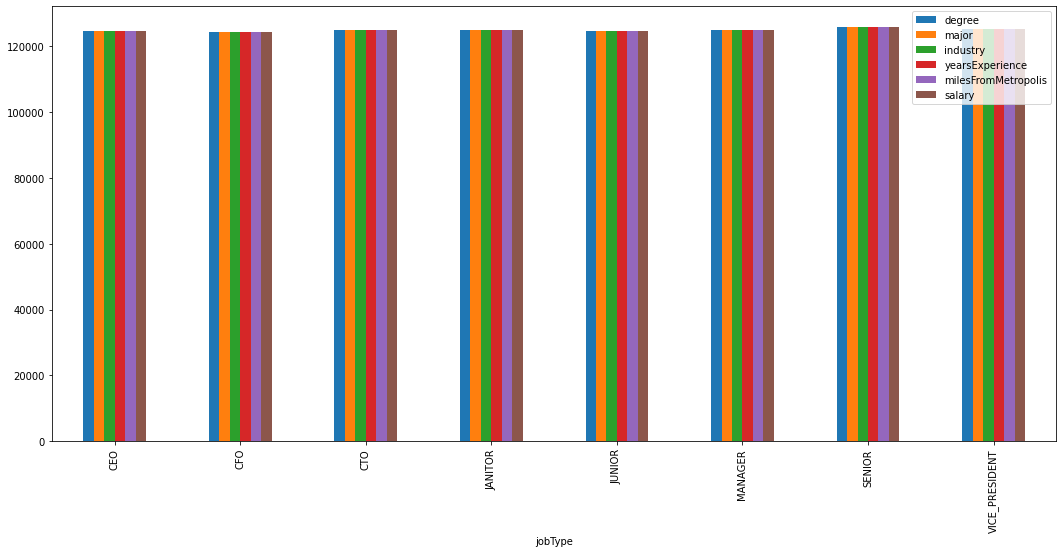

In [24]:
# goup data by jobType and plot count plot
train_data.groupby('jobType').count().plot(kind = 'bar', figsize = (18,8))

from above graph:
1. All data for each jobType is distributed equally.

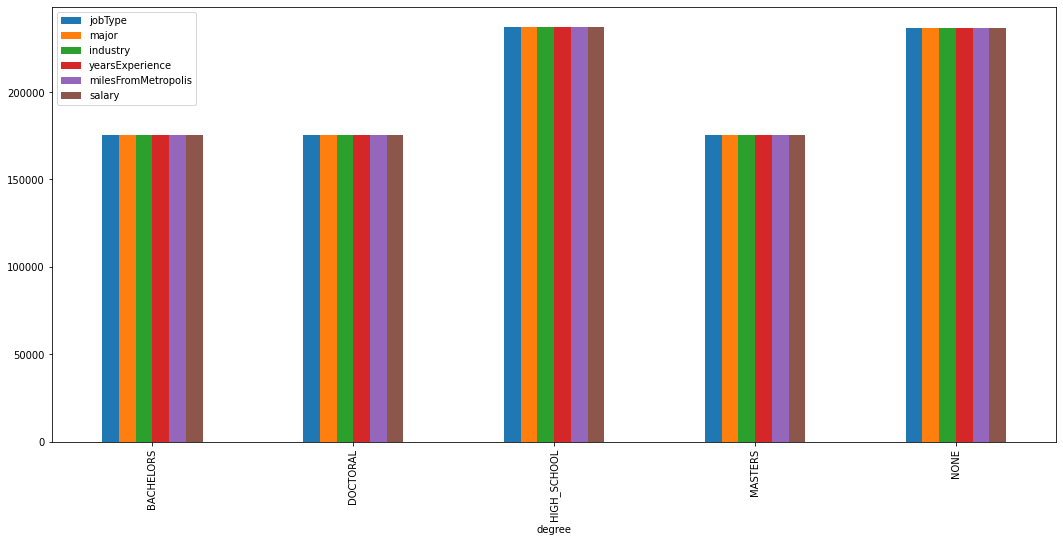

In [25]:
# goup data by degree and plot count plot
train_data.groupby('degree').count().plot(kind = 'bar', figsize = (18,8))

From above graph:

1. All data for BACHELORS, DOCTORAL, MASTERS are equally distributed.

2. All data for HIGH_SCHOOL, NONE are equally distributed.

3. Here the data distribution between group of BACHELORS, DOCTORAL, MASTERS is less than data distribution for group HIGH_SCHOOL, NONE

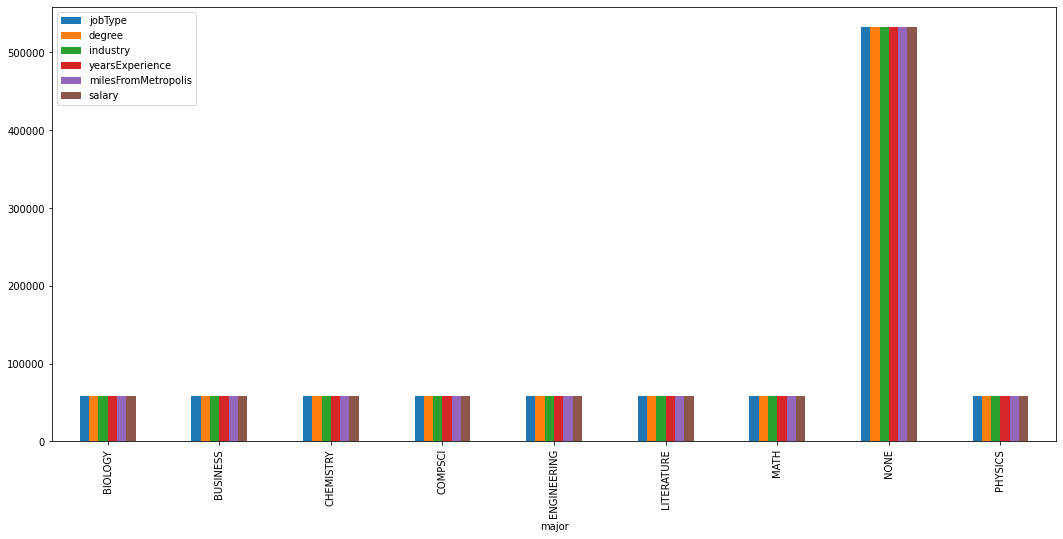

In [26]:
# goup data by major and plot count plot
train_data.groupby('major').count().plot(kind = 'bar', figsize = (18,8))

From above graph:

1. Except "NONE" all data for each major are equally distributed.

2. There is large distribution of data for major NONE as compared to other major's


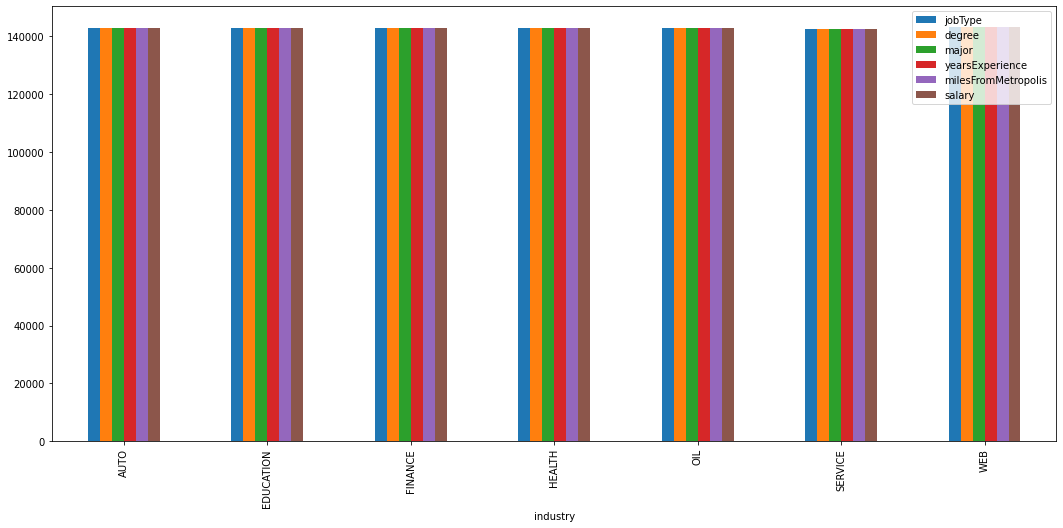

In [27]:
# goup data by industry and plot count plot
train_data.groupby('industry').count().plot(kind = 'bar', figsize = (18,8))

from above graph:
1. All data for each industry is distributed equally.

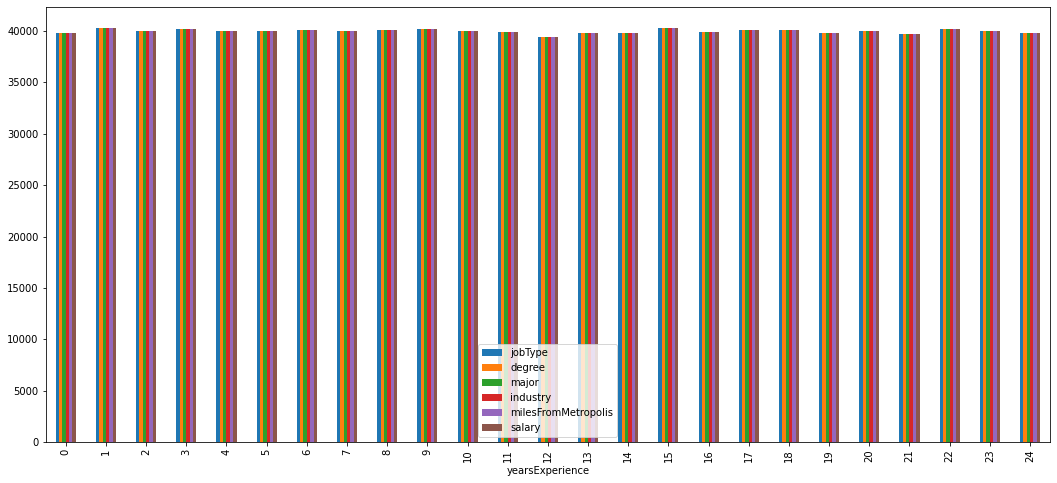

In [28]:
# goup data by yearsExperience and plot count plot
train_data.groupby('yearsExperience').count().plot(kind = 'bar', figsize = (18,8))

from above graph:
1. All data for each yearsExperience is distributed almost equally.

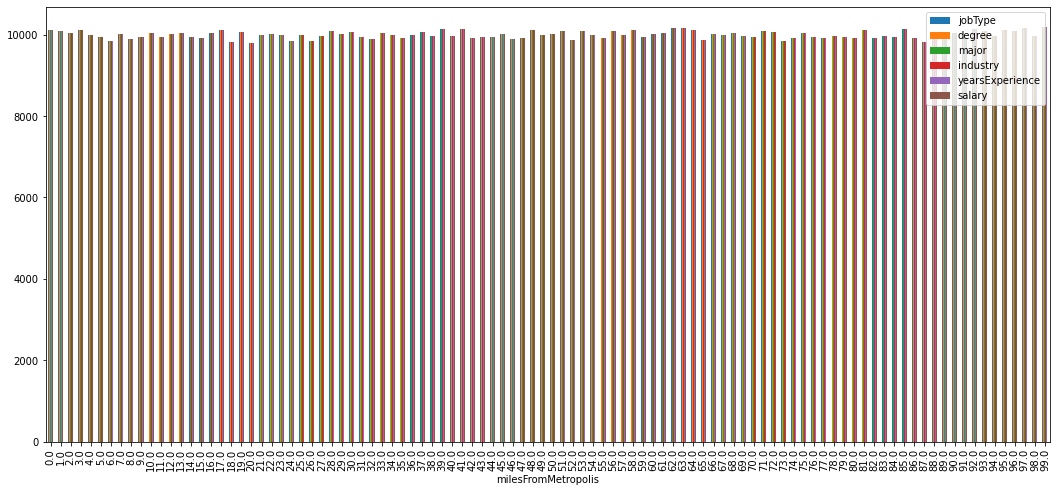

In [29]:
# goup data by milesFromMetropolis and plot count plot
train_data.groupby('milesFromMetropolis').count().plot(kind = 'bar', figsize = (18,8))


from above graph:
1. All data for each milesFromMetropolis is distributed almost equally.

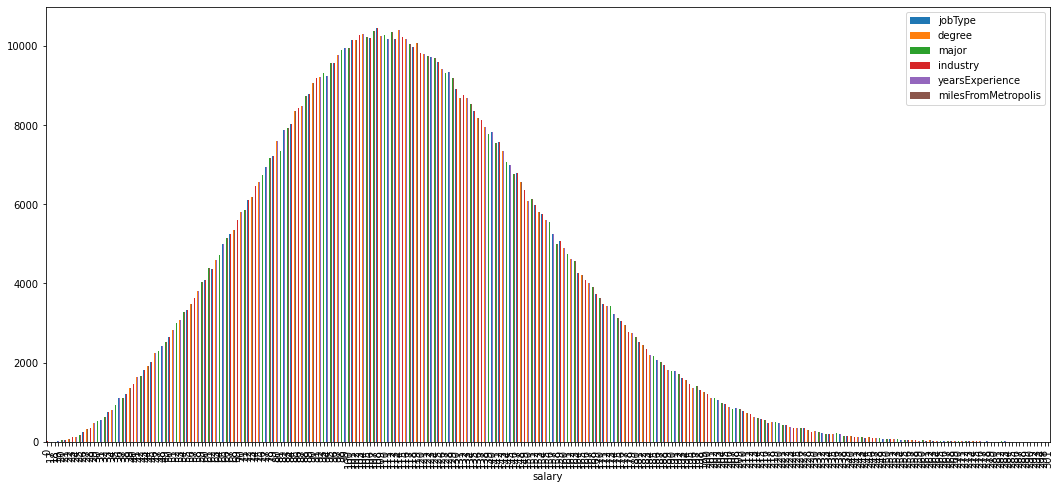

In [30]:
# goup data by salary and plot count plot
train_data.groupby('salary').count().plot(kind = 'bar', figsize = (18,8))

from above graph:
1. All data for each value of salary is distributed symmetrical and unimodel.

## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


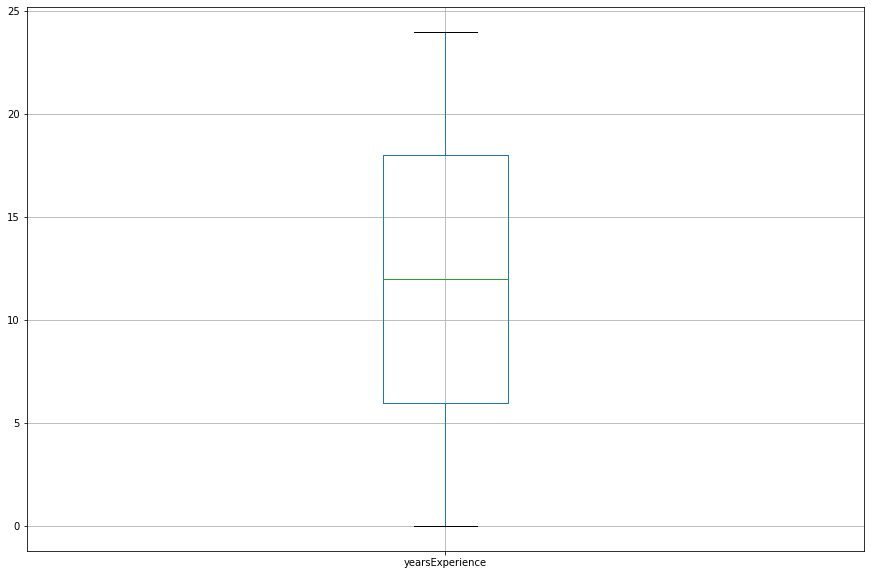

In [31]:
# box plot using pandas 
# box plot for yearsExperience column
train_data.boxplot(column= 'yearsExperience', figsize = (15,10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

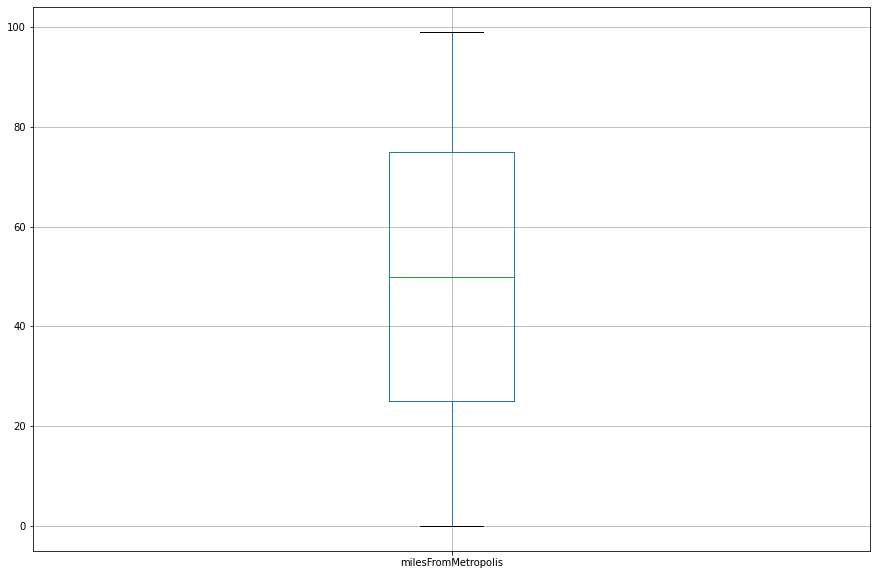

In [32]:
# box plot using pandas 
# box plot for milesFromMetropolies column
train_data.boxplot(column= 'milesFromMetropolis', figsize = (15,10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

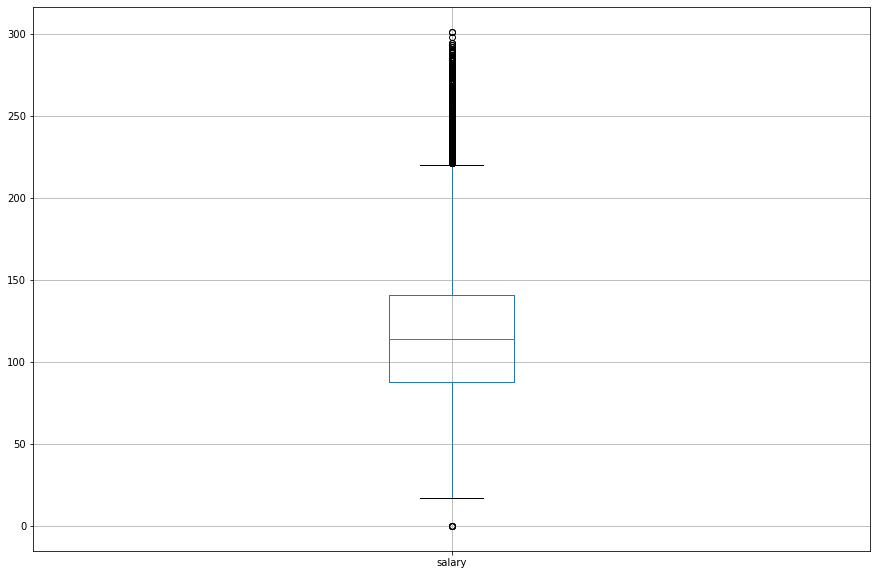

In [33]:
# box plot using pandas 
# box plot for salary column
train_data.boxplot(column= 'salary', figsize = (15,10))

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120

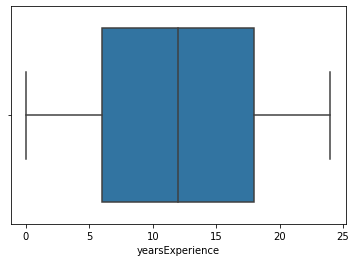

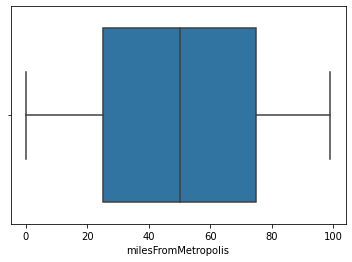

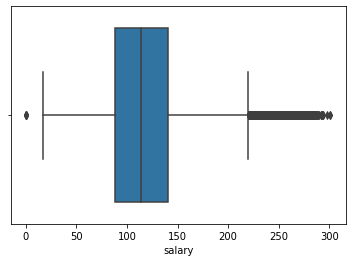

In [34]:
# box plot using seaborn 
# box plot for yearsExperience column
# box plot for mileFromMetropolis column
# box plot for salary column
for x in var_list:
  sns.boxplot(train_data[x])
  plt.show()


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

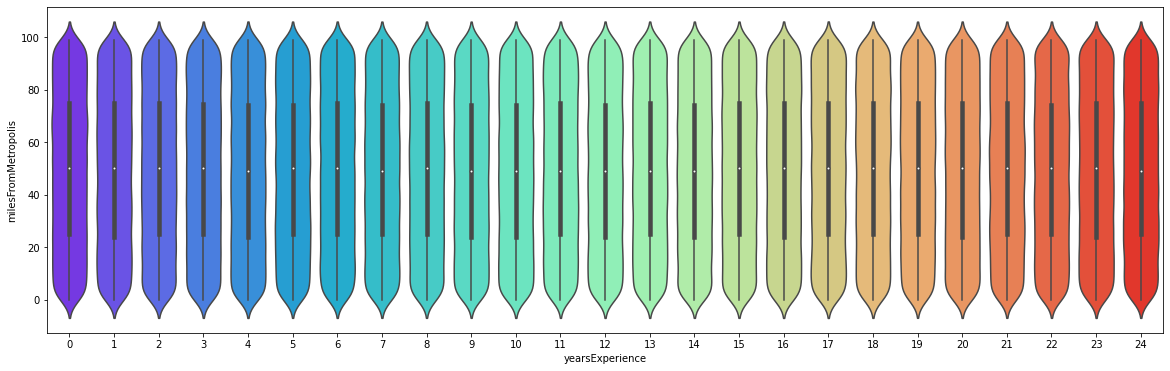

In [35]:
# violin plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='milesFromMetropolis', data=train_data, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

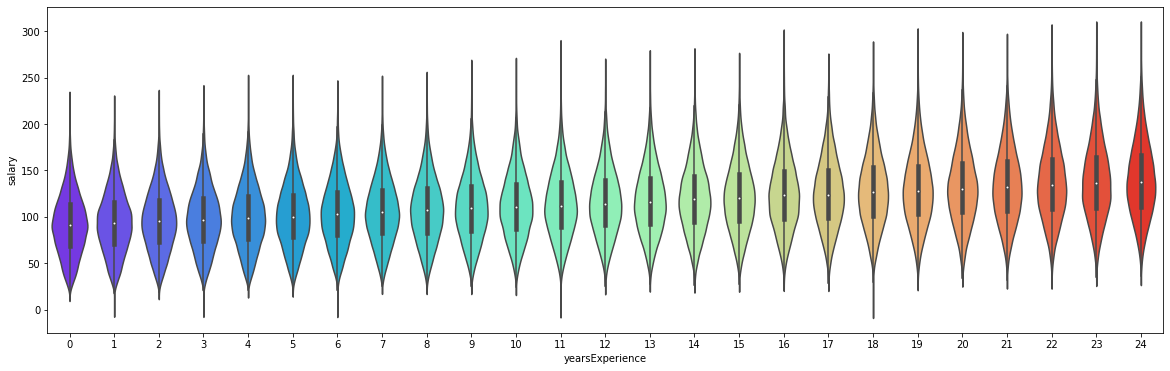

In [36]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='salary', data=train_data, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

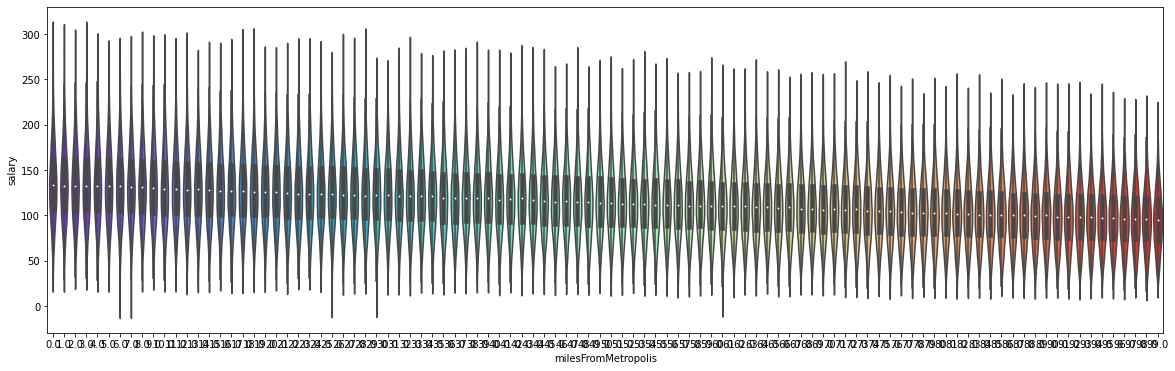

In [37]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis', y='salary', data=train_data, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


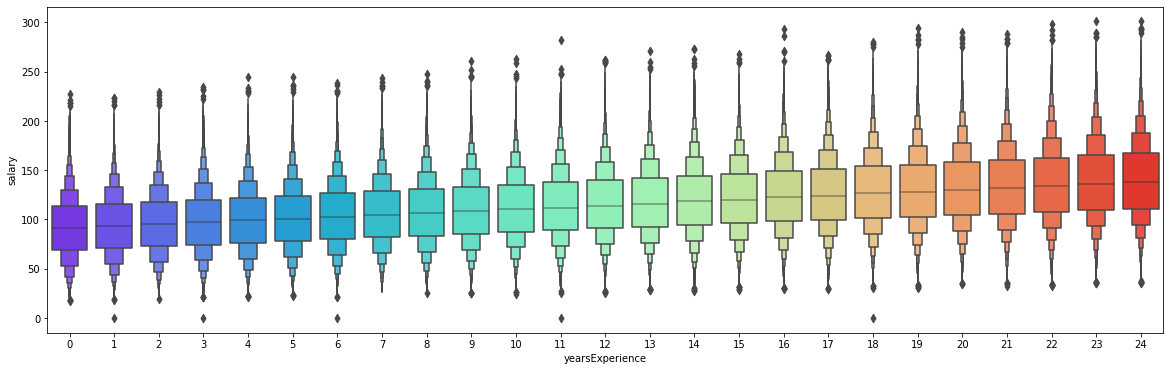

In [38]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize= (20,6))
sns.boxenplot(x = 'yearsExperience', y = 'salary', data= train_data, palette = 'rainbow')

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

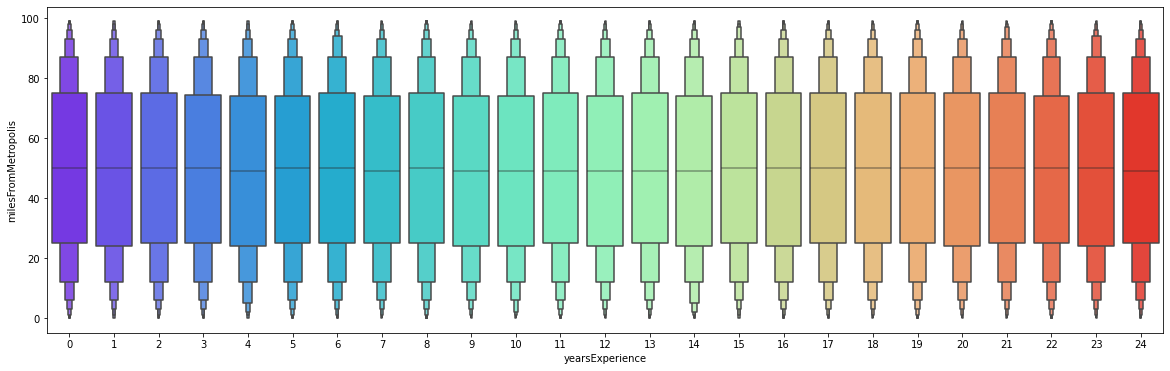

In [39]:
# boxen plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize= (20,6))
sns.boxenplot(x = 'yearsExperience', y = 'milesFromMetropolis', data= train_data, palette = 'rainbow')

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

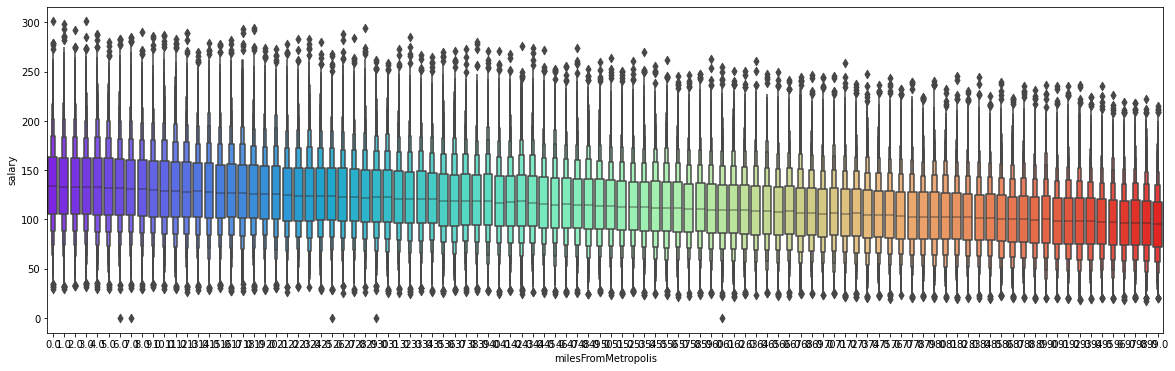

In [40]:
# boxen plot for milesFromMetropolis from salary columns
plt.figure(figsize= (20,6))
sns.boxenplot(x = 'milesFromMetropolis', y = 'salary', data= train_data, palette = 'rainbow')

from above boxen plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Point Plot


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

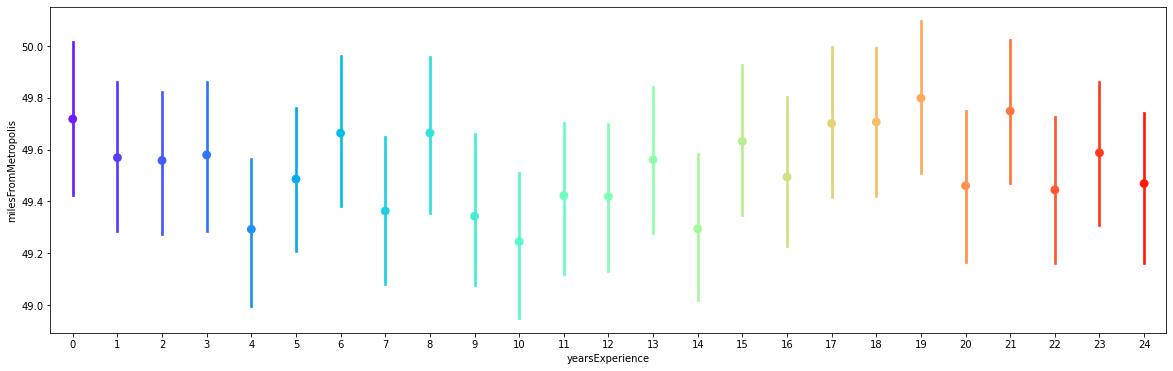

In [41]:
# point plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize= (20,6))
sns.pointplot(x = 'yearsExperience', y = 'milesFromMetropolis', data= train_data, palette = 'rainbow')

From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the milesFromMetropolis has dispersion of vales for each yearsExperience value

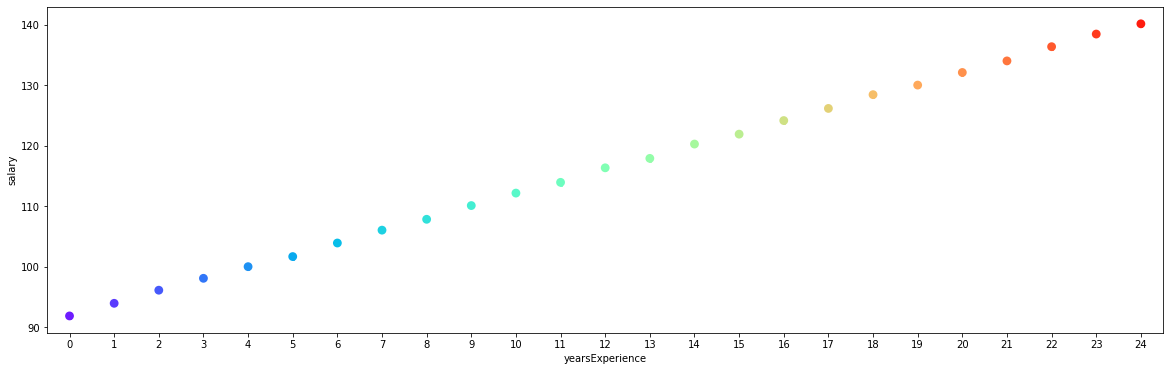

In [42]:
# point plot for yearsExperience and salary columns
plt.figure(figsize= (20,6))
sns.pointplot(x = 'yearsExperience', y = 'salary', data= train_data, palette = 'rainbow')

From above point plot

There is a increase in salary when there is a increase in yearsExperience

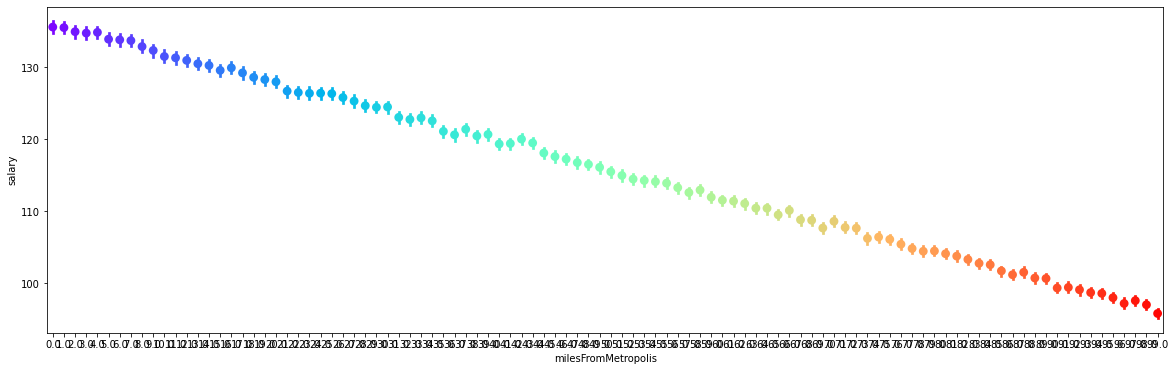

In [43]:
# point plot for milesFromMetropolis from salary columns
plt.figure(figsize= (20,6))
sns.pointplot(x = 'milesFromMetropolis', y = 'salary', data= train_data, palette = 'rainbow')

From above point plot

There is a decrease in salary when there is a decrease in yearsExperience

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


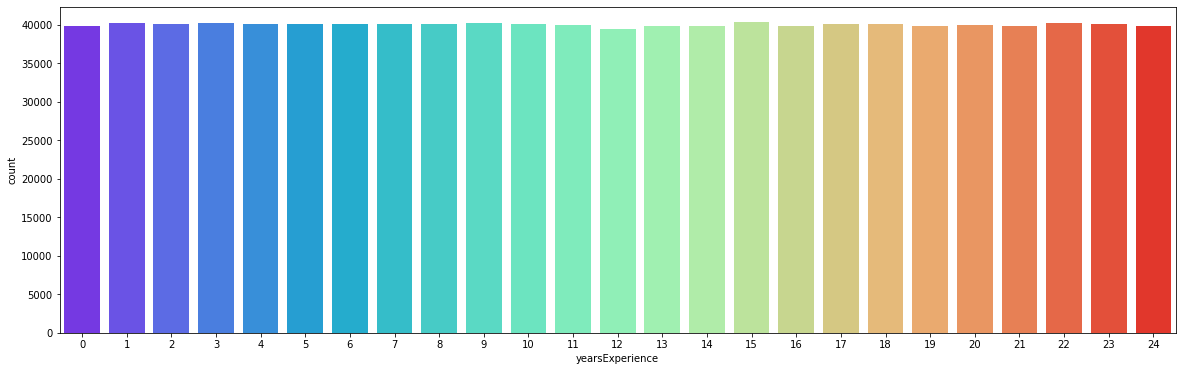

In [44]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize= (20,6))
sns.countplot(x = 'yearsExperience', data= train_data, palette = 'rainbow')

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

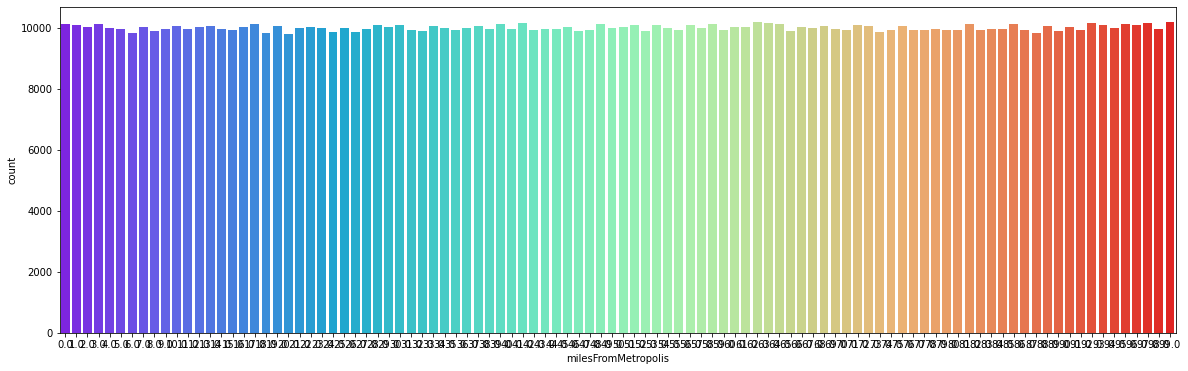

In [45]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize= (20,6))
sns.countplot(x = 'milesFromMetropolis', data= train_data, palette = 'rainbow')

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

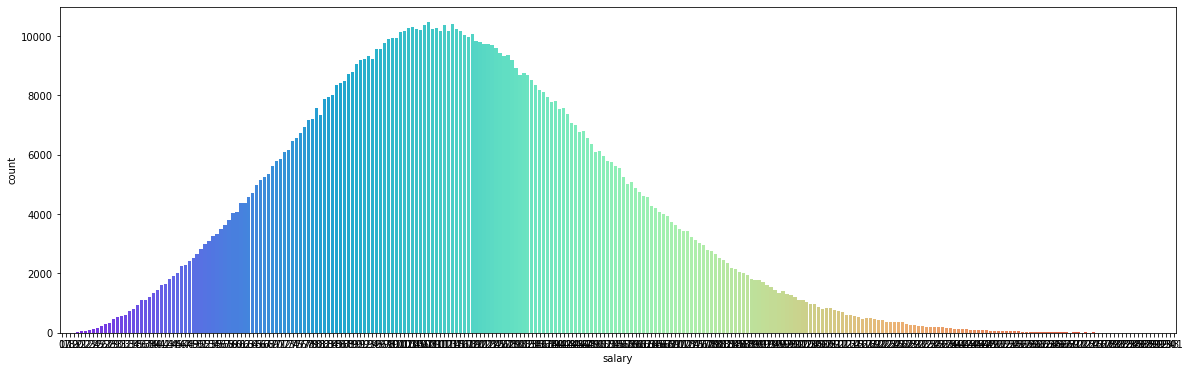

In [46]:
# count plot of whole datset based on salary
plt.figure(figsize= (20,6))
sns.countplot(x = 'salary', data= train_data, palette = 'rainbow')

From above count plot

distribution of values of yearExperience is symmetrical, unimodal.

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

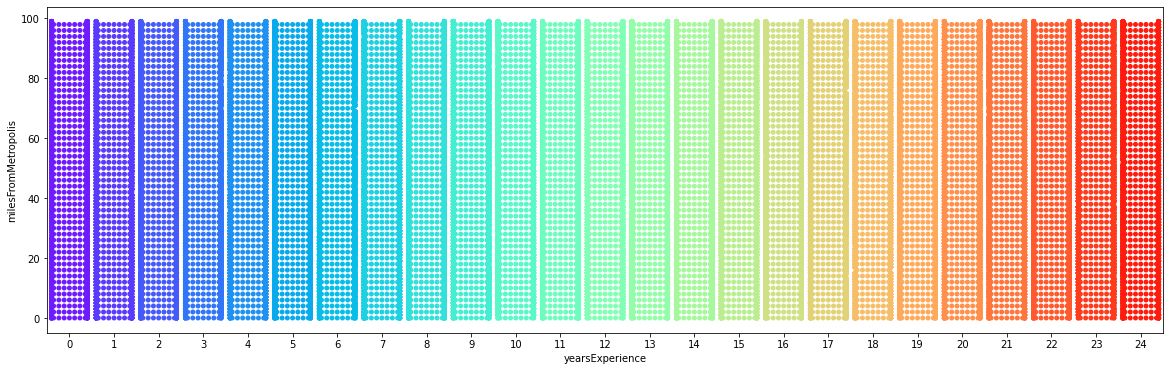

In [47]:
# swarm plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize= (20,6))
sns.swarmplot(x = 'yearsExperience', y = 'milesFromMetropolis', data= train_data.iloc[1:50000], palette = 'rainbow')

From above swarm plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

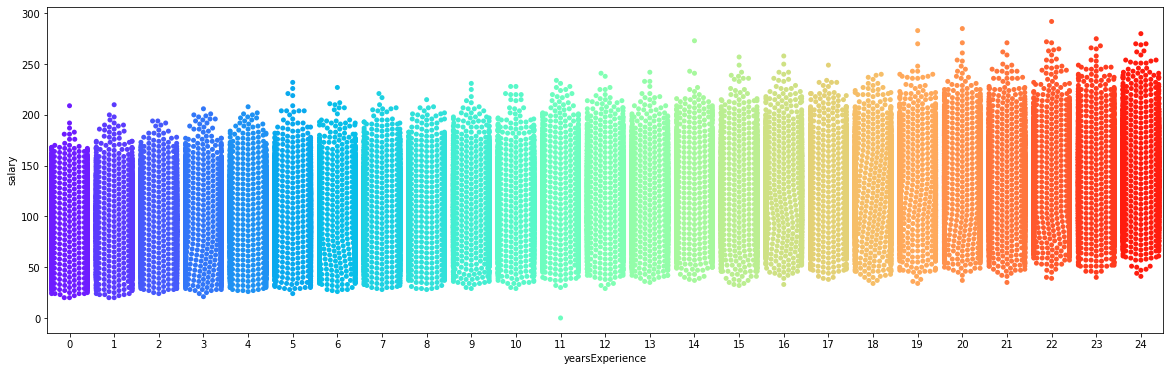

In [48]:
# swarm plot for yearsExperience and salary 
plt.figure(figsize= (20,6))
sns.swarmplot(x = 'yearsExperience', y = 'salary', data= train_data.iloc[1:50000], palette = 'rainbow')

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

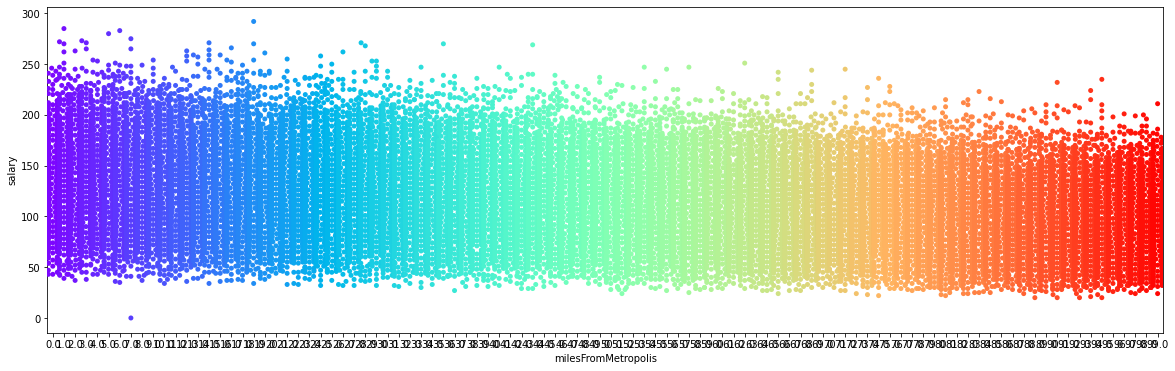

In [49]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize= (20,6))
sns.swarmplot(x = 'milesFromMetropolis', y = 'salary', data= train_data.iloc[1:50000], palette = 'rainbow')

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

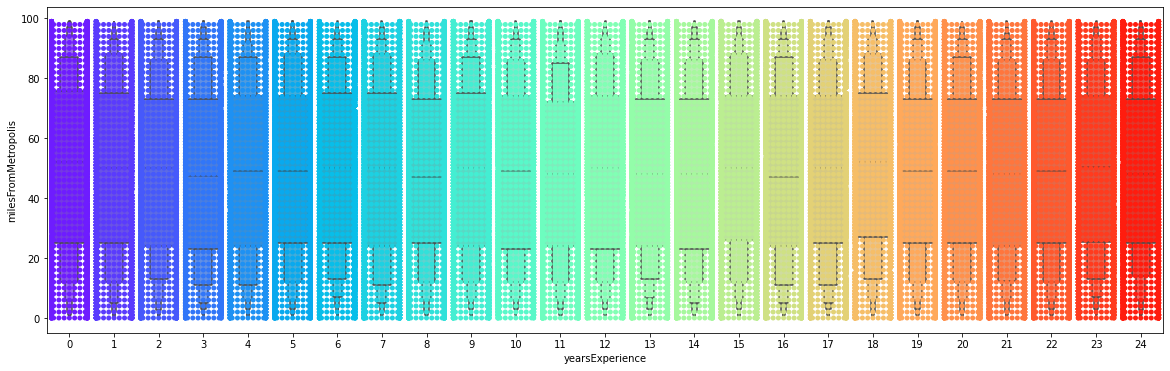

In [50]:
# combine boxen and swarm plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize= (20,6))
sns.boxenplot(x = 'yearsExperience', y = 'milesFromMetropolis', data= train_data.iloc[1:50000], palette = 'rainbow')
sns.swarmplot(x = 'yearsExperience', y = 'milesFromMetropolis', data= train_data.iloc[1:50000], palette = 'rainbow')

From above combine plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

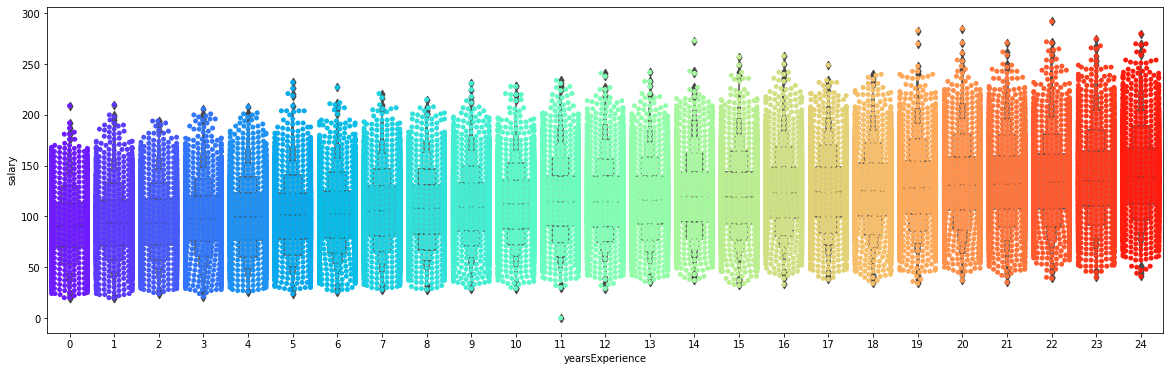

In [51]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize= (20,6))
sns.boxenplot(x = 'yearsExperience', y = 'salary', data= train_data.iloc[1:50000], palette = 'rainbow')
sns.swarmplot(x = 'yearsExperience', y = 'salary', data= train_data.iloc[1:50000], palette = 'rainbow')

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

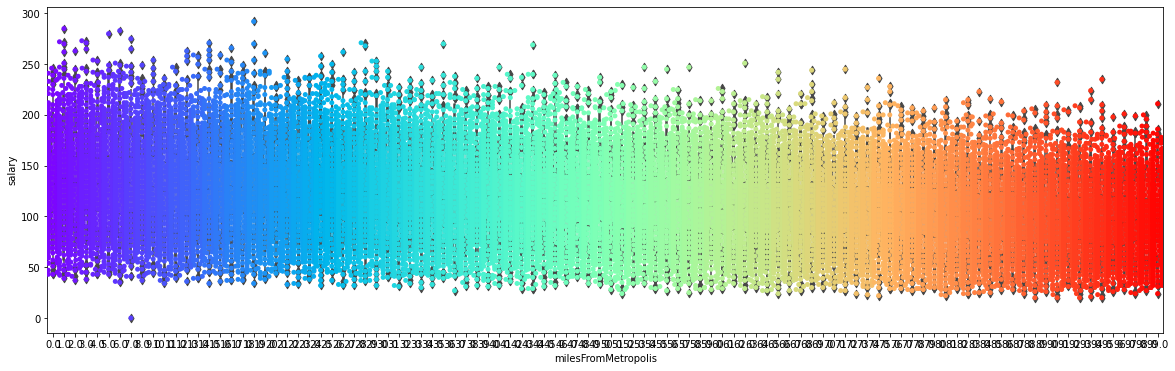

In [52]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize= (20,6))
sns.boxenplot(x = 'milesFromMetropolis', y = 'salary', data= train_data.iloc[1:50000], palette = 'rainbow')
sns.swarmplot(x = 'milesFromMetropolis', y = 'salary', data= train_data.iloc[1:50000], palette = 'rainbow')

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

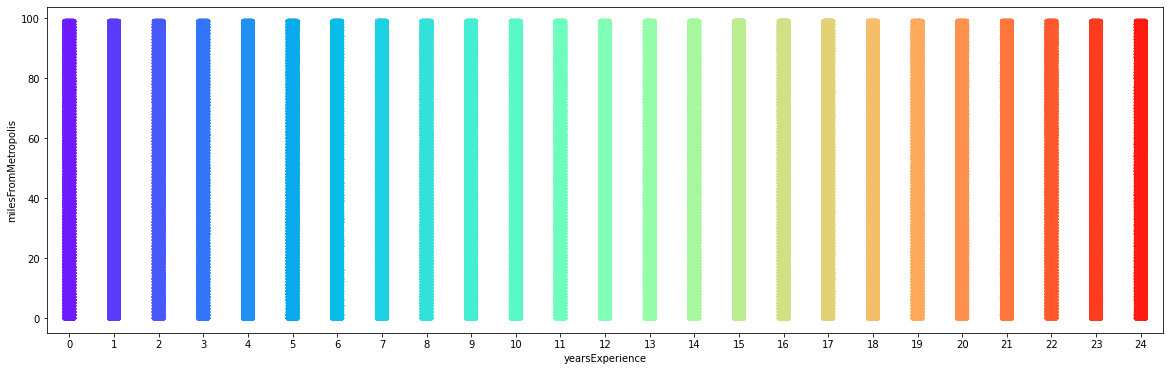

In [53]:
# strip plot between yearsExperience and milesFromMetropolis columns
plt.figure(figsize= (20,6))
sns.stripplot(x = 'yearsExperience', y = 'milesFromMetropolis', data = train_data, palette = 'rainbow')

from above strip plot:

Distribution of values of mileFromMetropolis is equal for each values of yearsExperience

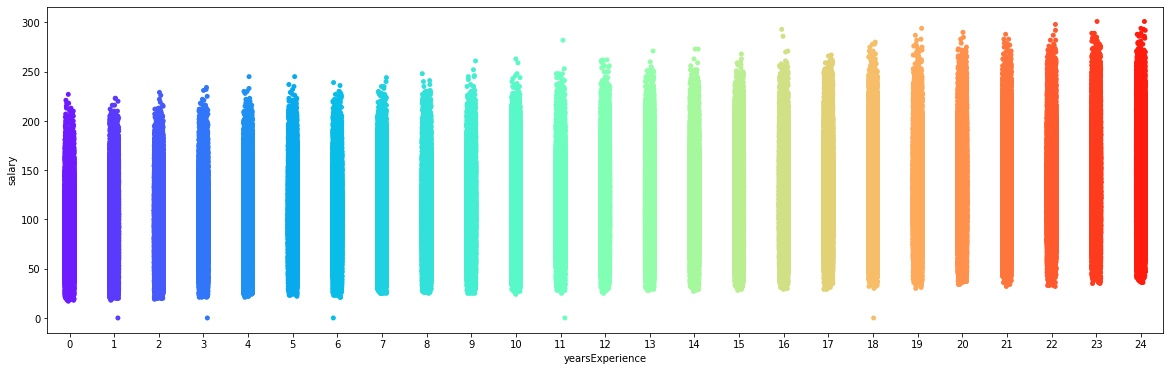

In [54]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize= (20,6))
sns.stripplot(x = 'yearsExperience', y = 'salary', data = train_data, palette = 'rainbow')

from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

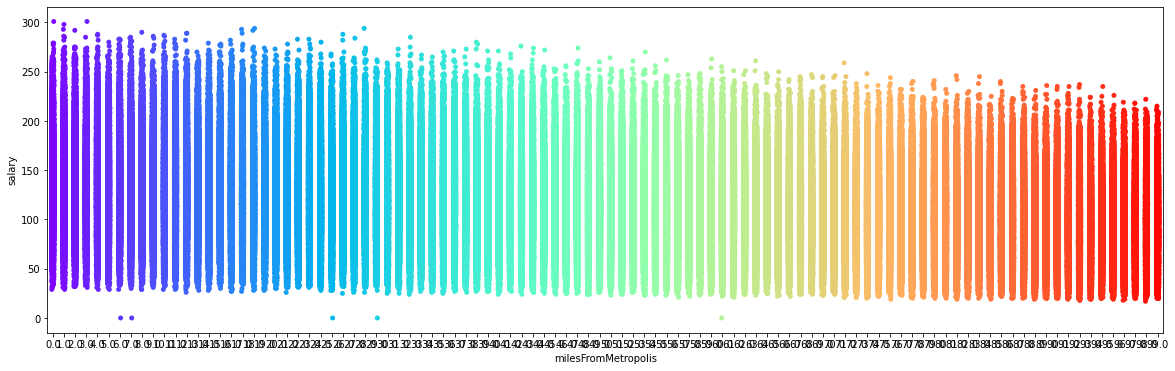

In [55]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize= (20,6))
sns.stripplot(x = 'milesFromMetropolis', y = 'salary', data = train_data, palette = 'rainbow')

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [56]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [57]:
# creating a dataframe of just numerical values from train_dataset
train_for_vif = train_data.drop(['jobType','degree','major','industry','salary'], axis=1)

# target values from train_dataset
target = train_data['salary']

# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
names

['yearsExperience', 'milesFromMetropolis']

In [58]:
# loop for calculating VIF for each feature.
for i in range(0, len(names)):

  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns == names[i]]
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]
  # Instantiating the statsmodel
  model = sm.OLS(y,x)
  results = model.fit()
  # fiting the OLS model on y and x
  rsq = results.rsquared
  # geting the r^2 value of results.
  vif =round(1/(1-rsq),2)
  # calculating vif value
  print('R square value of{} columns is{} keeping all other columns as features:'.format(names[i],(round(rsq,2))))
  print('Variance Inflation Factor of{} columns is () \n'.format(names[i], vif))

R square value ofyearsExperience columns is0.55 keeping all other columns as features:
Variance Inflation Factor ofyearsExperience columns is () 

R square value ofmilesFromMetropolis columns is0.55 keeping all other columns as features:
Variance Inflation Factor ofmilesFromMetropolis columns is () 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing


According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:



In [59]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x, y]]
  groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors = train_anova[x].unique()
  for major in unique_majors:
      stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
      plt.title("Probability Plot - " +  major)
      plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F 
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical 
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)




         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58596
5   LITERATURE   58684
6         MATH   57801
7         NONE  532355
8      PHYSICS   58410


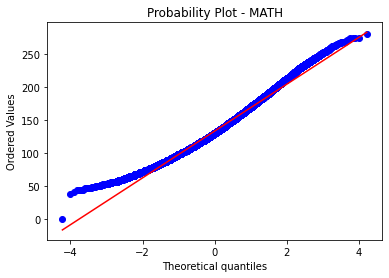

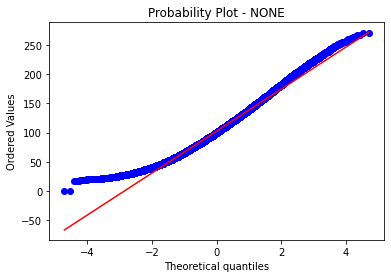

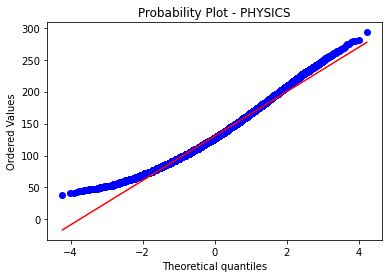

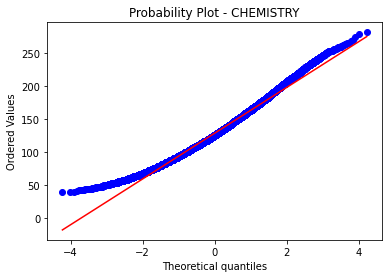

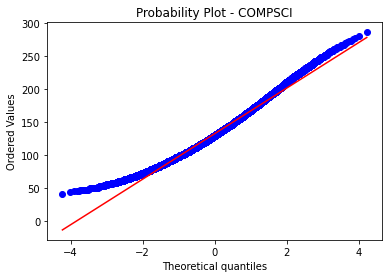

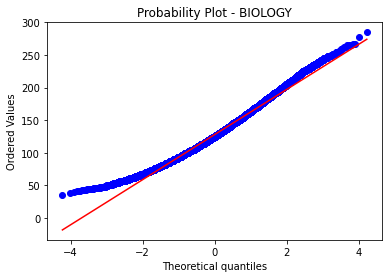

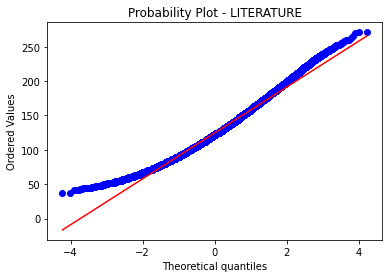

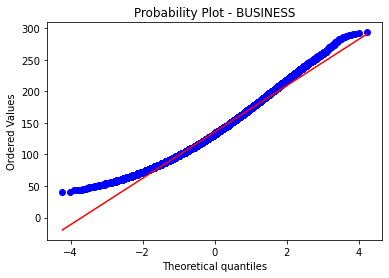

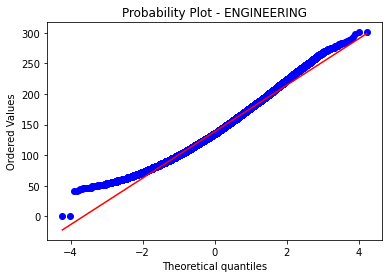

salary    1.137312
dtype: float64
                                    SS      df  ... P-value    F crit
Source of Variation                             ...                  
Between Groups        214940060.760225       8  ...     0.0  2.191831
Within Groups        1284137037.774666  999991  ...                  
Total                1499077098.534891  999999  ...                  

[3 rows x 6 columns]
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20922.428835180388  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 20922.428835180388  and critical value is: 2.19183090819007
Null Hypothesis is rejected.


In [60]:
# perform anova test on major and salary
perform_anova_test('major','salary')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125046
3         JANITOR  124971
4          JUNIOR  124594
5         MANAGER  125121
6          SENIOR  125886
7  VICE_PRESIDENT  125235


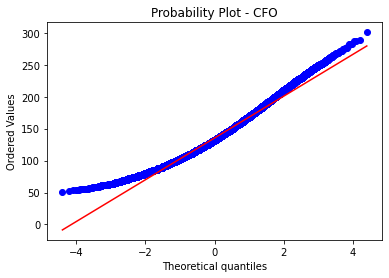

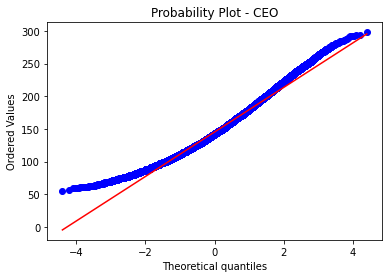

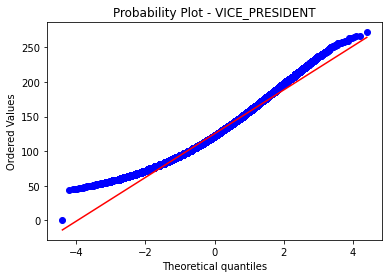

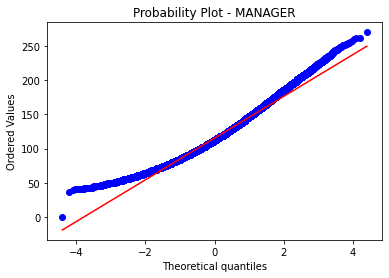

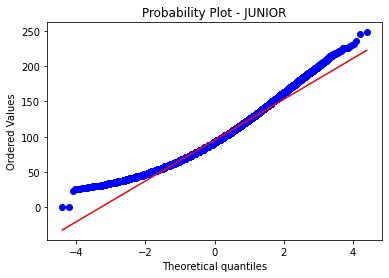

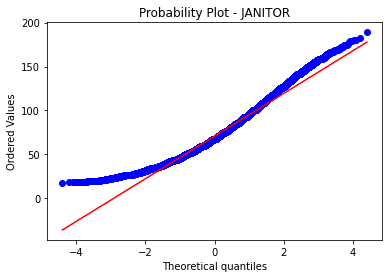

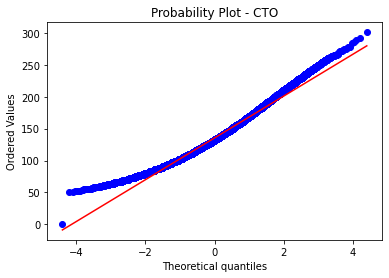

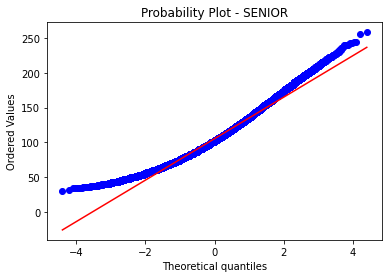

salary    1.3969
dtype: float64
                                    SS      df  ... P-value   F crit
Source of Variation                             ...                 
Between Groups        535091060.072659       7  ...     0.0  2.28755
Within Groups         963986038.462213  999992  ...                 
Total                1499077098.534871  999999  ...                 

[3 rows x 6 columns]
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 79296.75890294144  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 79296.75890294144  and critical value is: 2.287550350002609
Null Hypothesis is rejected.


In [61]:
# perform anova test on jobType and salary
perform_anova_test('jobType', 'salary')

        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175364
2  HIGH_SCHOOL  236976
3      MASTERS  175311
4         NONE  236854


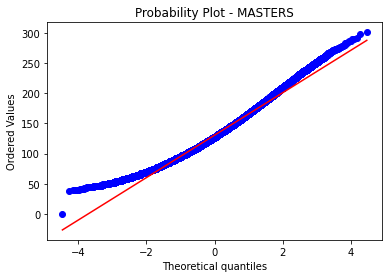

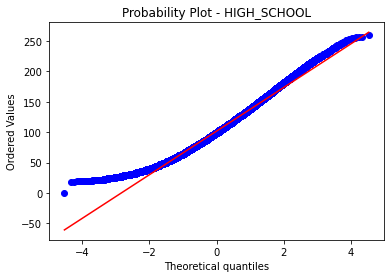

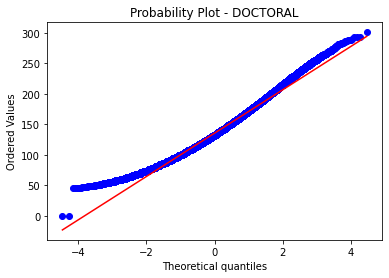

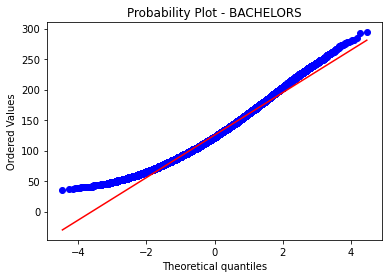

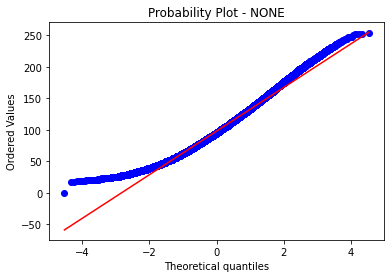

salary    1.034299
dtype: float64
                                    SS      df  ... P-value    F crit
Source of Variation                             ...                  
Between Groups        241396422.297586       4  ...     0.0  2.785834
Within Groups        1257680676.237301  999995  ...                  
Total                1499077098.534887  999999  ...                  

[3 rows x 6 columns]
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47984.20216602098  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 47984.20216602098  and critical value is: 2.785834431296894
Null Hypothesis is rejected.


In [62]:
# perform anova test on degree and salary
perform_anova_test('degree','salary')

    industry  salary
0       AUTO  142943
1  EDUCATION  142819
2    FINANCE  142867
3     HEALTH  142755
4        OIL  142771
5    SERVICE  142639
6        WEB  143206


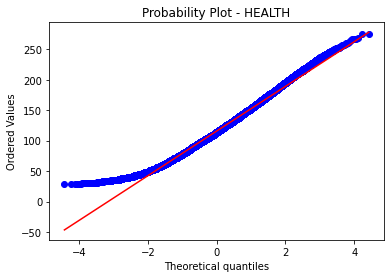

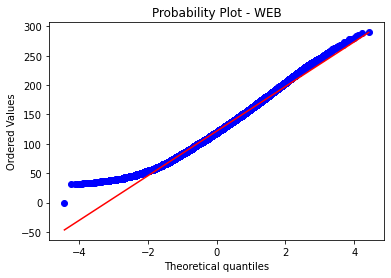

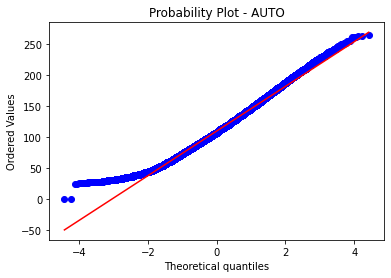

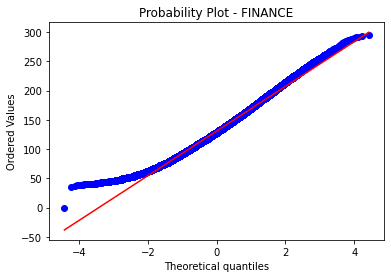

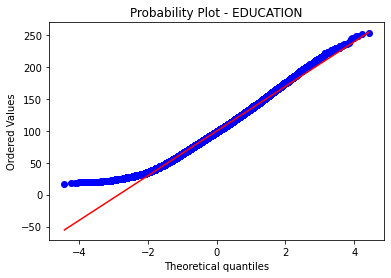

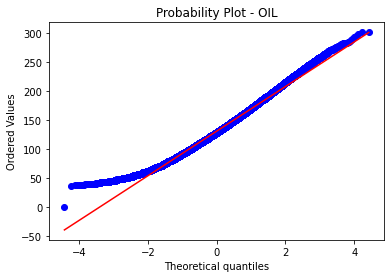

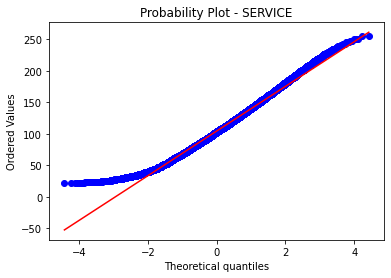

salary    1.0974
dtype: float64
                                    SS      df  ... P-value    F crit
Source of Variation                             ...                  
Between Groups        131887990.448761       6  ...     0.0  2.408242
Within Groups        1367189108.086116  999993  ...                  
Total                1499077098.534877  999999  ...                  

[3 rows x 6 columns]
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 16077.64261880987  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 16077.64261880987  and critical value is: 2.408241804936668
Null Hypothesis is rejected.


In [63]:
# perform anova test on industry and salary
perform_anova_test('industry','salary')

          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125046
3         JANITOR           124971
4          JUNIOR           124594
5         MANAGER           125121
6          SENIOR           125886
7  VICE_PRESIDENT           125235


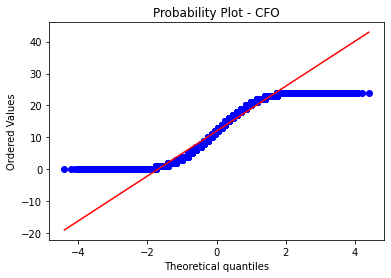

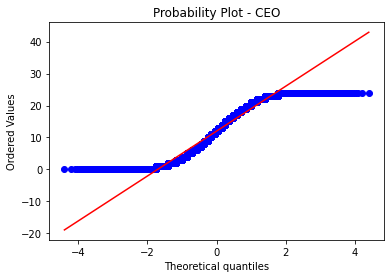

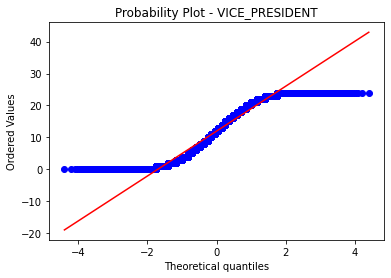

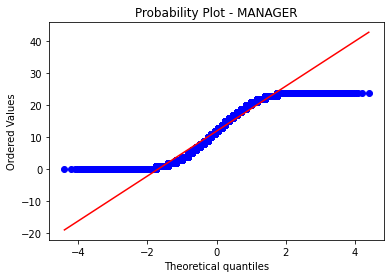

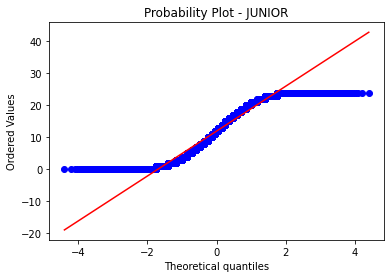

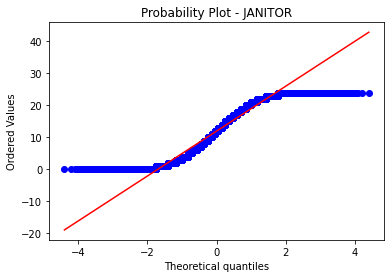

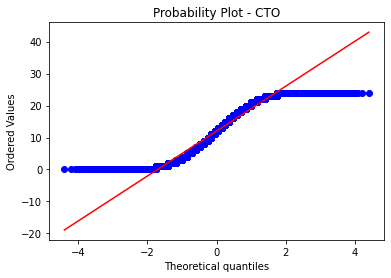

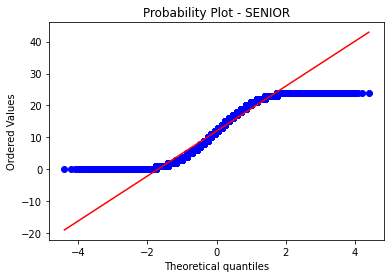

yearsExperience    1.002522
dtype: float64
                                  SS      df  ...   P-value   F crit
Source of Variation                           ...                   
Between Groups            117.457034       7  ...  0.944194  2.28755
Within Groups        52018412.569971  999992  ...                   
Total                52018530.027004  999999  ...                   

[3 rows x 6 columns]
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.3225673597094048  and p value is: 0.9441941901986974
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.3225673597094048  and critical value is: 2.287550350002609
Failed to reject the null hypothesis.


In [64]:
# perform anova test on jobType and yearsExperience
perform_anova_test('jobType','yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175364
2  HIGH_SCHOOL           236976
3      MASTERS           175311
4         NONE           236854


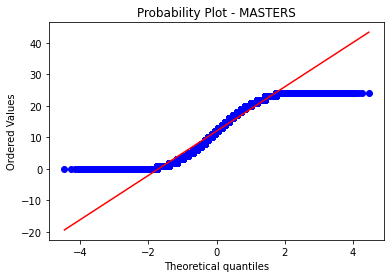

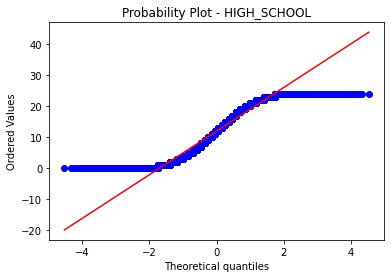

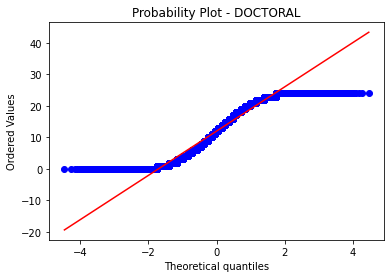

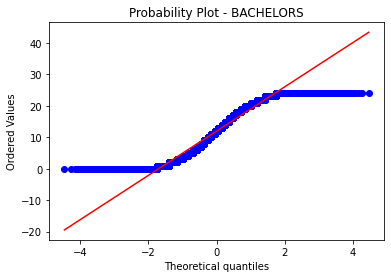

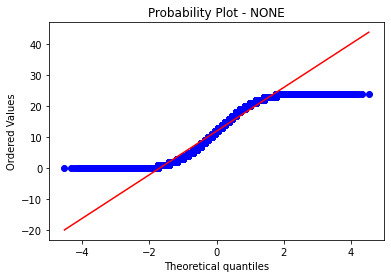

yearsExperience    1.002005
dtype: float64
                                  SS      df  ...   P-value    F crit
Source of Variation                           ...                    
Between Groups             40.221125       4  ...  0.942004  2.785834
Within Groups         52018489.80588  999995  ...                    
Total                52018530.027004  999999  ...                    

[3 rows x 6 columns]
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.19330109231773057  and p value is: 0.9420038025970138
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.19330109231773057  and critical value is: 2.785834431296894
Failed to reject the null hypothesis.


In [65]:
# perform anova test on degree and yearsExperience
perform_anova_test('degree', 'yearsExperience' )

         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58596
5   LITERATURE            58684
6         MATH            57801
7         NONE           532355
8      PHYSICS            58410


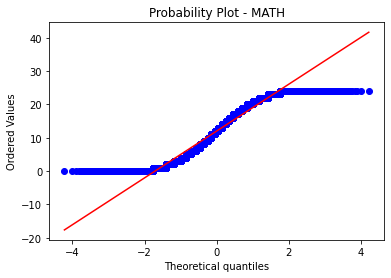

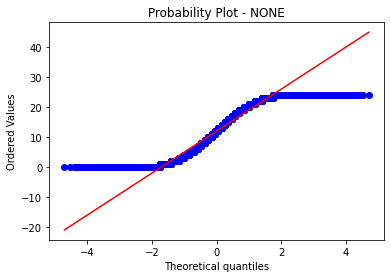

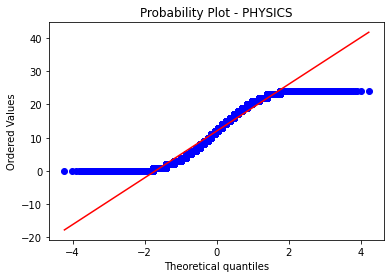

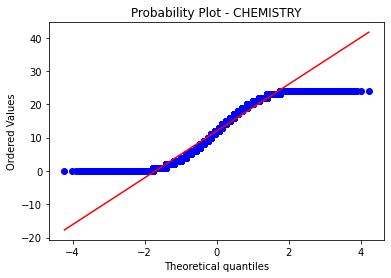

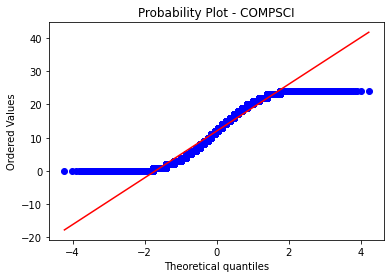

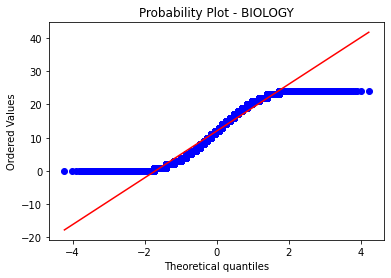

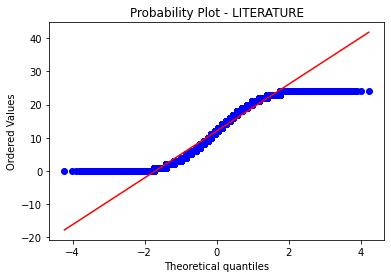

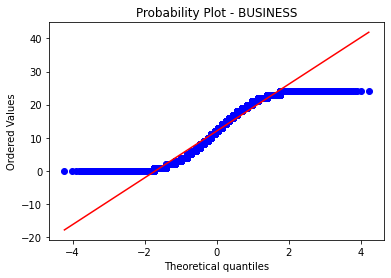

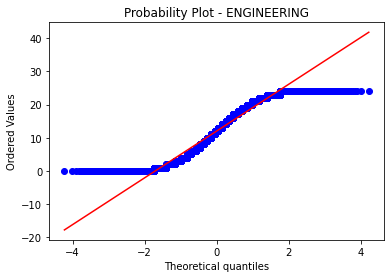

yearsExperience    1.006637
dtype: float64
                                  SS      df  ...   P-value    F crit
Source of Variation                           ...                    
Between Groups             73.972363       8  ...  0.993928  2.191831
Within Groups        52018456.054641  999991  ...                    
Total                52018530.027005  999999  ...                    

[3 rows x 6 columns]
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.17775349187267195  and p value is: 0.9939281417130893
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.17775349187267195  and critical value is: 2.19183090819007
Failed to reject the null hypothesis.


In [66]:
# perform anova test on major and yearsExperience
perform_anova_test('major','yearsExperience')

    industry  yearsExperience
0       AUTO           142943
1  EDUCATION           142819
2    FINANCE           142867
3     HEALTH           142755
4        OIL           142771
5    SERVICE           142639
6        WEB           143206


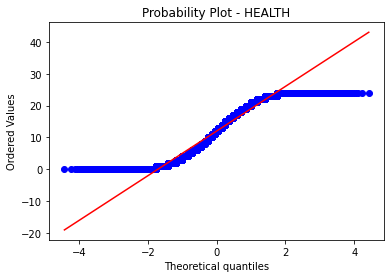

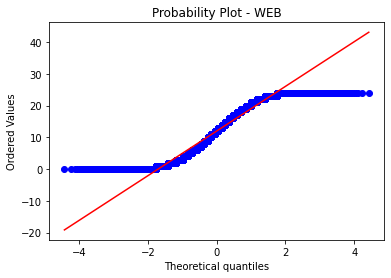

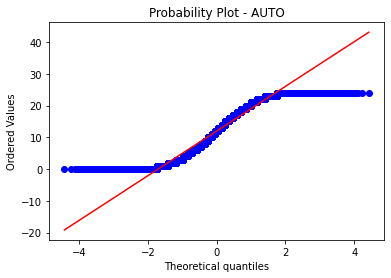

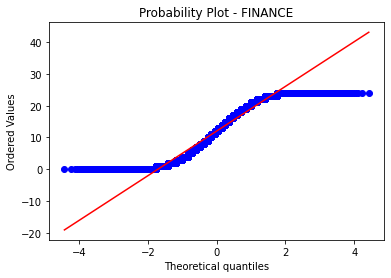

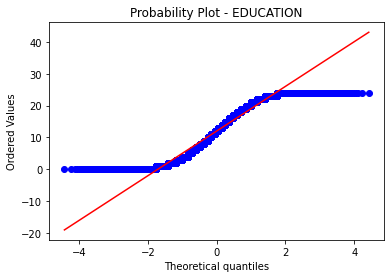

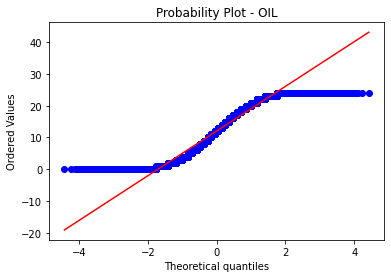

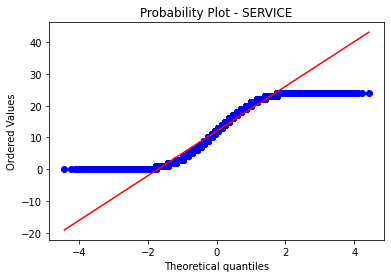

yearsExperience    1.002384
dtype: float64
                                  SS      df  ...   P-value    F crit
Source of Variation                           ...                    
Between Groups            182.340098       6  ...  0.743267  2.408242
Within Groups        52018347.686906  999993  ...                    
Total                52018530.027004  999999  ...                    

[3 rows x 6 columns]
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 0.5842131652958172  and p value is: 0.7432671010723688
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 0.5842131652958172  and critical value is: 2.408241804936668
Failed to reject the null hypothesis.


In [67]:
# perform anova test on industry and yearsExperience
perform_anova_test('industry', 'yearsExperience')

## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

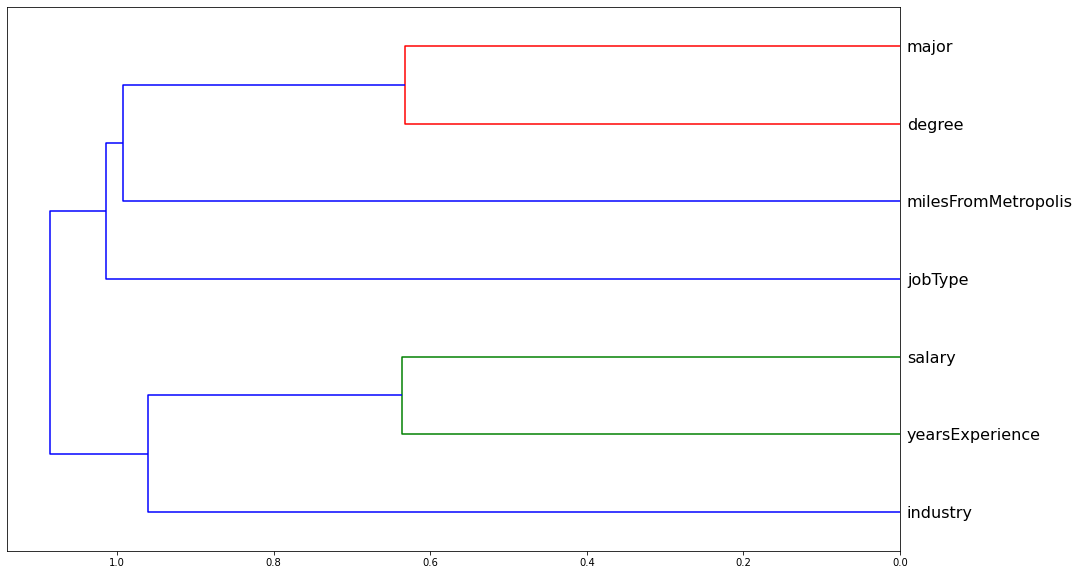

In [68]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]
import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize = (16,10))
dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left', leaf_font_size = 16)
plt.show()

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [69]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  df[col]= scaler.fit_transform(df[col])
  return df

In [70]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience', 'milesFromMetropolis','salary']
# passing data and column name for scaling
train_data = scale_data(train_data,col_train)

# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [71]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
  
  def __init__(self,**kwargs):
    super(OneHotEncoder,self).__init__(**kwargs)
    self.fit_flag=False
  
        
    # helper function to fit data  
  def fit(self, X, **kwargs):
    out = super().fit(X)
    self.fit_flag=True
    return out

    # helper function to transform data  
  def transform(self, X, **kwargs):
    sparse_matrix=super(OneHotEncoder,self).transform(X)
    new_columns = self.get_new_columns(X=X)
    d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index)
    return d_out
    

    # helper function to fit and transform data
  def fit_transform(self,X,**kwargs):
    self.fit(X)
    return self.transform(X)  
    
    
    # helper function to get new column names after fitting and tranforming data 
  def get_new_columns(self,X):
    new_columns = []
    for i, column in enumerate(X.columns):
      j=0
      while j<len(self.categories_[i]):
        new_columns.append(f'{column}{self.categories_[i][j]}')
        j+=1
    return new_columns


  

In [72]:
# Split the labels and the target
train_X = train_data.drop(['salary', 'yearsExperience', 'milesFromMetropolis'], axis=1)
train_Y = train_data['salary']

In [73]:
train_X.head()

jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [74]:
train_Y.head()

0    0.431894
1    0.335548
2    0.455150
3    0.471761
4    0.541528
Name: salary, dtype: float64

In [75]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()


jobTypeCEO  jobTypeCFO  ...  yearsExperience  milesFromMetropolis
0         0.0         1.0  ...         0.416667             0.838384
1         1.0         0.0  ...         0.125000             0.737374
2         0.0         0.0  ...         0.416667             0.383838
3         0.0         0.0  ...         0.333333             0.171717
4         0.0         0.0  ...         0.333333             0.161616

[5 rows x 31 columns]

In [76]:
#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size = 0.2)

In [77]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y):
  return math.sqrt(((x-y)**2).mean())

# Function for calculating all the relevant metrics 
def print_score(m):
  res = [rmse(m.predict(X_train), Y_train),rmse(m.predict(X_test),Y_test),
         m.score(X_train, Y_train), m.score(X_test, Y_test),
         median_absolute_error(m.predict(X_train), Y_train), median_absolute_error(m.predict(X_test), Y_test),
         metrics.mean_absolute_error(m.predict(X_train), Y_train), metrics.mean_absolute_error(m.predict(X_test), Y_test)]

  print('RMSE-Train:'+str(res[0]) + "\nRMSE-Test" +str(res[1]) + "\n SCORE-Train:" + str(res[2]) + "\n Score-Test" + str(res[3])+
        "\n MEDAE-Train" + str(res[4]) + "\n MEDAE-Test" + str(res[5]) + "\nMeanAE-Train" + str(res[6]) + "\n MEANAE-Test" + str(res[7]), '\n')      

In [78]:
# Visualizing importance of all the features in the dataset for the prediction
def visualize_importance(feature_importances, feat_train_df):
  
    # creating dataframe for feature name and feature importance
  feature_importance_df = pd.DataFrame()
  
  _df=pd.DataFrame()
  _df['feature_importance']= feature_importances
  _df['column']=feat_train_df.columns
  feature_importance_df = pd.concat([feature_importance_df, _df], axis = 0, ignore_index=True)


    # grouping all data and sorting in descending order
  order = feature_importance_df.groupby('column').sum()[['feature_importance']].sort_values('feature_importance', ascending = False).index[:50] 
    
    # ploting feature importance data using boxenplot
  fig,ax = plt.subplots(figsize = (8,max(6,len(order)*.25)))
  sns.boxenplot(data= feature_importance_df, x= 'feature_importance', y='column', order=order, ax=ax, palette= 'viridis', orient= 'h')  

    # return fig, ax
  ax.tick_params(axis='x', rotation=0)
  ax.set_title('Importance')
  ax.grid()
  fig.tight_layout()
  return fig,ax  

### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

RMSE-Train:0.06514978571241295
RMSE-Test0.06511149020126156
 SCORE-Train:0.7433427746071151
 Score-Test0.7442862322412271
 MEDAE-Train0.04560763336891352
 MEDAE-Test0.04564613519712937
MeanAE-Train0.052639503429324115
 MEANAE-Test0.0526379724653377 

CPU times: user 3.15 s, sys: 728 ms, total: 3.88 s
Wall time: 2.41 s


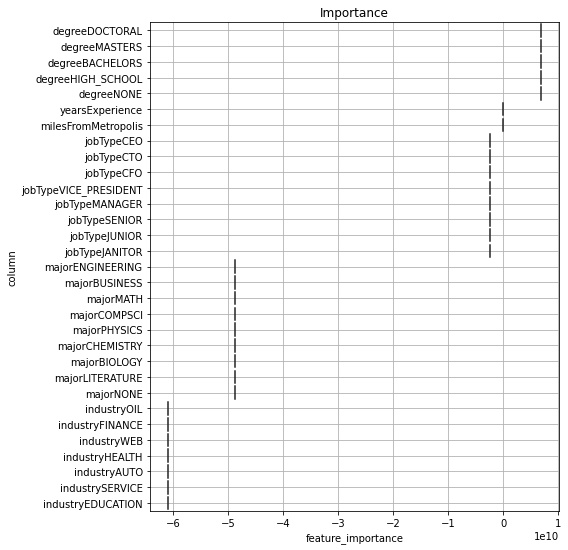

In [79]:
%%time
# Fit a Linear Regression model to the train dataset
from sklearn.linear_model import LinearRegression
# Import LinearRegressor
lr=LinearRegression()

# Fit the model to the data
lr.fit(X_train, Y_train)

# print score of the model by calling function
print_score(lr)

# visualizing the importance of features.
fig,ax= visualize_importance(lr.coef_,train_X)

### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train:0.06648241734685992
RMSE-Test0.06825435007381336
 SCORE-Train:0.7327355984789867
 Score-Test0.7190044046903302
 MEDAE-Train0.04348837209302335
 MEDAE-Test0.046342192691029765
MeanAE-Train0.05251014776306461
 MEANAE-Test0.054599577047497995 

CPU times: user 3min 6s, sys: 437 ms, total: 3min 7s
Wall time: 3min 6s


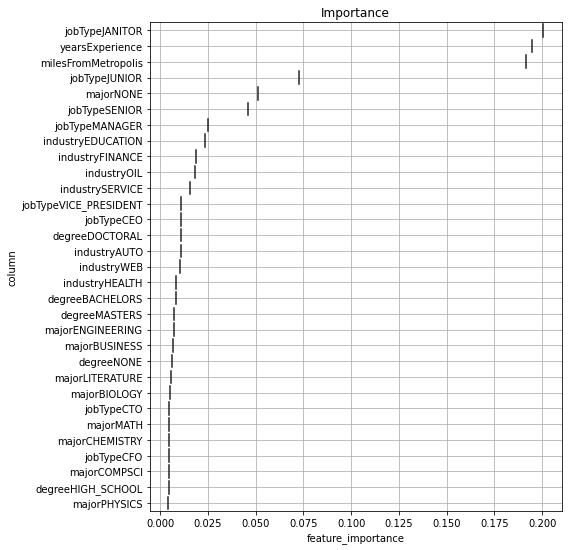

In [80]:
%%time
# Fit a Random Forest Regressor model to the train dataset
# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf= RandomForestRegressor()

# Fit the model to the data
rf.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model by calling function
print_score(rf)

# visualizing the importance of features.
fig,ax= visualize_importance(rf.feature_importances_, train_X.iloc[1:50000])


### KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

### Note:
For KNN we used only 10000 samples out of 1000000.
You can use complete dataset if you want, it will take longer time to train the model.

In [81]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset
# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knn= KNeighborsRegressor()

# Fit the model to the data
knn.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])
# print score of the model by calling function
print_score(knn)


RMSE-Train:0.07947875624001748
RMSE-Test0.07937263530987805
 SCORE-Train:0.6180296643742393
 Score-Test0.6200027612703991
 MEDAE-Train0.05049833887043187
 MEDAE-Test0.04983388704318947
MeanAE-Train0.061889604651162784
 MEANAE-Test0.061814637873754165 

CPU times: user 17min 6s, sys: 46.2 s, total: 17min 53s
Wall time: 15min 10s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train:0.06457876308283231
RMSE-Test0.0645299322739026
 SCORE-Train:0.747822138978737
 Score-Test0.7488337626179162
 MEDAE-Train0.04528459861172428
 MEDAE-Test0.045365260888429126
MeanAE-Train0.052146214959060265
 MEANAE-Test0.05213655844275415 

CPU times: user 18.7 s, sys: 874 ms, total: 19.6 s
Wall time: 19.4 s


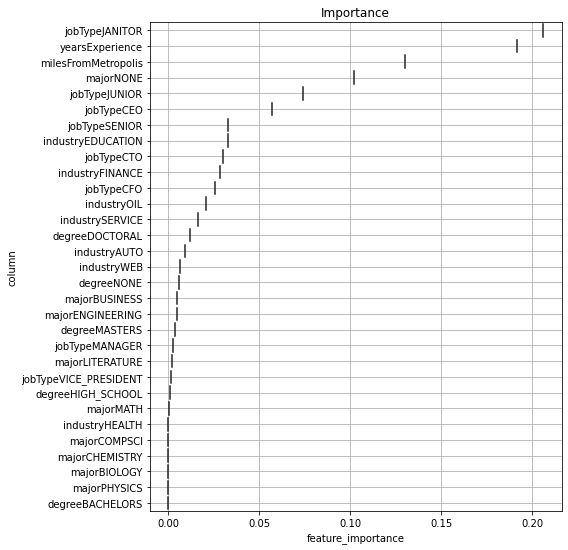

In [82]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gb= GradientBoostingRegressor()

# Fit the model to the data
gb.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model by calling function
print_score(gb)

# visualizing the importance of features.
fig,ax = visualize_importance(gb.feature_importances_, train_X.iloc[1:50000])

### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

RMSE-Train:0.08929471891162238
RMSE-Test0.09202065168757795
 SCORE-Train:0.5178534529879524
 Score-Test0.48924873581701156
 MEDAE-Train0.05315614617940201
 MEDAE-Test0.056478405315614655
MeanAE-Train0.06736240379291251
 MEANAE-Test0.07161682170542635 

CPU times: user 3.17 s, sys: 27.9 ms, total: 3.2 s
Wall time: 3.19 s


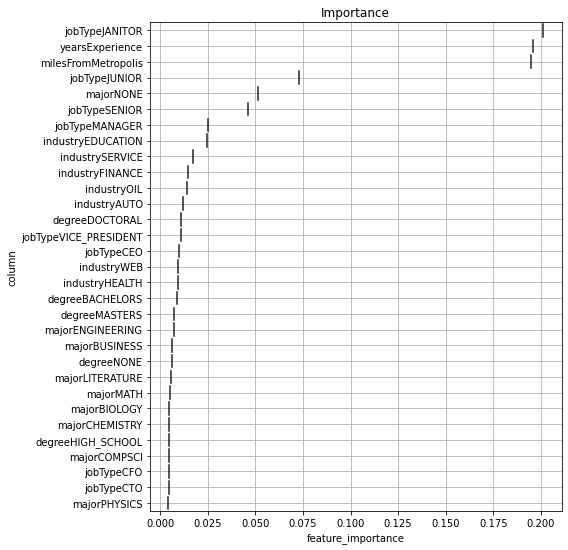

In [83]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
dt = DecisionTreeRegressor()
# Fit the model to the data
dt.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
# print score of the model by calling function
print_score(dt)
# visualizing the importance of features.
fig,ax = visualize_importance(dt.feature_importances_, train_X.iloc[1:50000])


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

[14:20:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-Train:0.06457619393261067
RMSE-Test0.06451675805544972
 SCORE-Train:0.7478422034670928
 Score-Test0.7489363066930057
 MEDAE-Train0.045263286494337446
 MEDAE-Test0.045332428773376246
MeanAE-Train0.05213447044765088
 MEANAE-Test0.052120593129612286 

CPU times: user 17 s, sys: 473 ms, total: 17.5 s
Wall time: 17.5 s


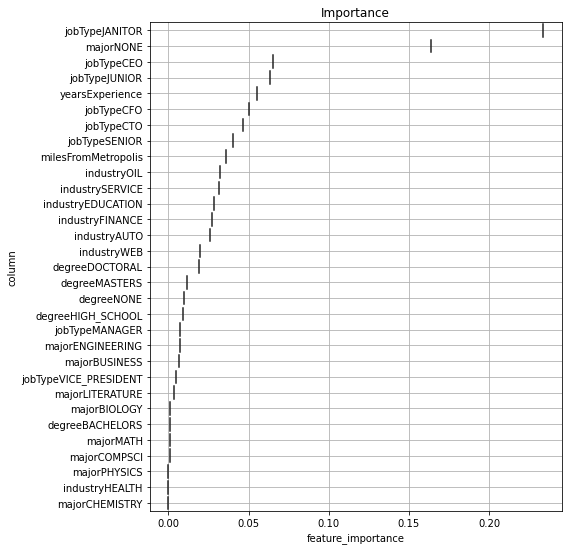

In [84]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor
# Instantiate the model
xg = XGBRegressor()
# Fit the model to the data
xg.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
# print score of the model by calling function
print_score(xg)
# visualizing the importance of features.
fig,ax = visualize_importance(xg.feature_importances_, train_X.iloc[1:50000])

### Light Gradient Boosted Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

RMSE-Train:0.06322462567637012
RMSE-Test0.06324128970049375
 SCORE-Train:0.7582869795508836
 Score-Test0.7587650229085665
 MEDAE-Train0.04456830013235741
 MEDAE-Test0.0446084901805702
MeanAE-Train0.051249527431113676
 MEANAE-Test0.051298519420446144 

CPU times: user 29.9 s, sys: 144 ms, total: 30 s
Wall time: 29.9 s


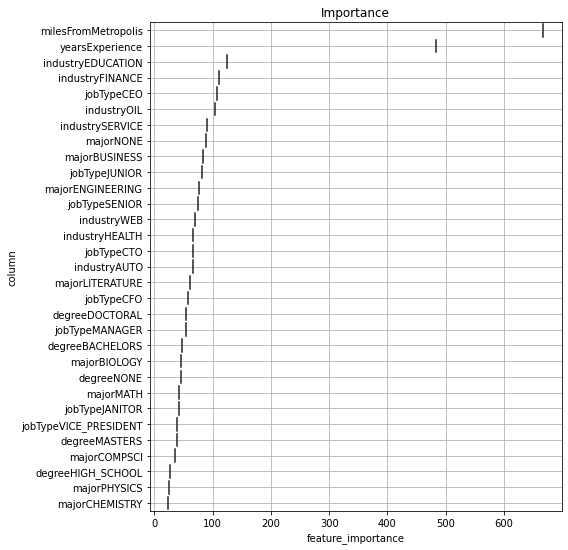

In [85]:
%%time
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm
import lightgbm as lgbm
# Instantiate the model
lg = lgbm.LGBMRegressor()
# Fit the model to the data
lg.fit(X_train.iloc[1:50000], Y_train[1:50000])
# print score of the model by calling function
print_score(lg)
# visualizing the importance of features.
fig,ax = visualize_importance(lg.feature_importances_, train_X.iloc[1:50000]) 

### Comparing all the model based on metric

In [86]:
# Helper function for comparing models metrics
def compare_models(models,names, X_train, Y_train, X_test, Y_test):
  import sklearn.metrics as metrics
  from sklearn.model_selection import train_test_split
                   

    # create a dataframe with a column metric and metrics names as values
  data = {'Metric':['rmse','MedAE','MAE','R-squared']}
  df_train= pd.DataFrame(data)
  df_test= pd.DataFrame(data)
    # get metrics of each model, and add to dataframe 
  def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

  for (model,name) in zip(models,names):
    y_pred = model.predict(X_test)
    res = [rmse(model.predict(X_train), y_train), rmse(model.predict(X_test), y_test),
           metrics.median_absolute_error(model.predict(X_train), Y_train), metrics.median_absolute_error(model.predict(X_test), Y_test),
           metrics.mean_absolute_error(model.predict(X_train), Y_train), metrics.mean_absolute_error(model.predict(X_test), Y_test),
           metrics.r2_score(model.predict(X_train), Y_train), metrics.r2_score(model.predict(X_test), Y_test)]
    df_train[name]= [res[0], res[2], res[4], res[6]]
    df_test[name]= [res[1], res[3], res[5], res[7]]
  return df_train, df_test

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7, random_state=8)

In [90]:
# list of models object
models = [lr,rf,xg,knn,lg,dt]
# list of models name
names = ['LR', 'RF', 'XG', 'KNN', 'LG', 'DT']
# use function for comparing models by passing list of models object, names, train and test data
comp_model_train = compare_models(models,names, X_train, Y_train, X_test, Y_test)
comp_model_test = compare_models(models,names, X_train, Y_train, X_test, Y_test)

ValueError: ignored

#### RMSE of all model on train and test data


In [91]:
# printing rmse comparision of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test)

NameError: ignored

#### All metrics on train and test data

In [92]:
# printing comparision of model on train and test
print('Results on Test Data')
comp_model_test

Results on Test Data


NameError: ignored

## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [93]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model, X_train, Y_train, param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 9, n_jobs = -1)
  # fit random search best parameters
  random.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
  random.best_params_

In [94]:
# create RandomForest parameters dict for tunning
rf_para_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                'max_features':['auto', 'sqrt'],
                'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
                'min_samples_split': [2,5,10],
                'min_samples_leaf': [1,2,4],
                'bootstrap': [True, False]}
# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestRegressor(), X_train, Y_train, param_grid = rf_para_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [95]:
# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {'n_estimators': [x for x in range(50,500,20)],
                 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                 'max_depth': [x for x in range(5,20)],
                 'min_samples_split':[x for x in range(2,10)]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingRegressor(), X_train, Y_train, param_grid = GBR_para_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [97]:
# create KNNRegressor parameters dict for tunning
knn_para_grid = {'leaf_size':list(range(1,50)),
                 'n_neighbors': list(range(1,30)),
                 'p':[1,2]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(KNeighborsRegressor(), X_train, Y_train, param_grid = knn_para_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [98]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {'splitter': ["best", "random"],
                 'max_depth': [1,3,5,7,9,11,12],
                 'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
                 'min_weight_fraction_leaf':[0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                 'max_features': ['auto', 'log2', 'sqrt',None],
                 'max_leaf_nodes': [None, 10,20,30,40,50,60,70,80,90]}
# passing data for hyper parameter tunning with Randomized search cv
random_Search(DecisionTreeRegressor(), X_train, Y_train, param_grid = DTR_para_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [99]:
# create XGBoostRegressor parameters dict for tunning
XGB_para_grid = {'learning_rate':[0.05,0.10, 0.15,0.20,0.25,0.30],
                 'max_depth':[3,4,5,6,8,9,10,12,15],
                 'min_child_weight': [1,3,5,7],
                 'gamma': [0.1, 0.2, 0.3, 0.4],
                 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}
# passing data for hyper parameter tunning with Randomized search cv
random_Search(XGBRegressor(), X_train, Y_train, param_grid = XGB_para_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[15:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### NOTE:

you can use any one of RandomizedSearchCv or GridSearchCV, both works fine.

## Grid Search

One traditional and popular way to perform hyperparameter tuning is by using an Exhaustive Grid Search from Scikit learn. 

This method tries every possible combination of each set of hyper-parameters. 

Using this method, we can find the best set of values in the parameter search space. 

This usually uses more computational power and takes a long time to run since this method needs to try every combination in the grid size.

In [114]:
# Helper function to perform hyper parameter tunning with GridSearchCV
def grid_search(model,grid):
  from sklearn.model_selection import GridSearchCV



    # Grid search of parameters, using 5 fold cross validation
  model_cv= GridSearchCV(estimator = model, param_grid = grid, scoring = 'neg_mean_absolute_error',
                            cv = 5, return_train_score = True, n_jobs = 8, verbose = 1)

    #fit model_cv
  model_cv.fit(X_train, Y_train)
    # print best parameters
  print(model_cv.best_params_)

    # print best score
  print(model_cv.best_score_)
  

In [125]:
# create parameters dict in list for tunning
rf_para_grid = [{'n_estimators': [100,300,500,800,1200], 'max_depth': [5,8,15,20,30],'min_samples_split':[2,5,10,15,100], 'min_samples_leaf': [1,2,5,10]}]

# passing data for hyper parameter tunning with Gridsearchcv
grid_search(rf, X_train, Y_train, param_grid = rf_para_grid)

TypeError: ignored

Note: above cell only tune RandomForest, you can create cells and tune  all models using GridSearchCv, parameters are same as of RandomisedSearchCv

### Now working with the test dataset provided

In [126]:
# test data 
test_X = test_data

In [127]:
# passing test data for scaling, similarly as done for train data
col_test = ['yearsExperience', 'milesFromMetropolis']
test_X = scale_data(test_X,col_test)

In [128]:
# passing test dataset for one hot encoding process
encoder = OneHotEncoder()
test_drop = test_X.drop(['jobType', 'degree', 'major', 'industry'], axis = 1)
test_X = encoder.fit_transform(test_X.drop(['yearsExperience', 'milesFromMetropolis'], axis = 1))
test_X = test_X.join(test_drop['yearsExperience'])
test_X = test_X.join(test_drop['milesFromMetropolis'])
test_X.head()

jobTypeCEO  jobTypeCFO  ...  yearsExperience  milesFromMetropolis
0         0.0         0.0  ...         0.916667             0.737374
1         0.0         0.0  ...         0.833333             0.474747
2         0.0         0.0  ...         0.708333             0.090909
3         0.0         0.0  ...         0.583333             0.969697
4         0.0         0.0  ...         0.416667             0.444444

[5 rows x 31 columns]

In [129]:
# Perforn the prediction on the test dataset
y_predicted = rf.predict(test_X)
y_predicted

array([0.4009546 , 0.26993355, 0.58053156, ..., 0.18496678, 0.5144186 ,
       0.36528239])

In [130]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)

In [131]:
# predicted values in dataframe
predictions.head()

0
0  0.400955
1  0.269934
2  0.580532
3  0.329849
4  0.371993

### Conclusion
According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.